<a href="https://colab.research.google.com/github/SachithPathiranage/Predict-Term-Deposit/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# **Data Preprocessing**

In [2]:
!ls 'drive/MyDrive/ML CW - Bank'

# Read Dataset
df = pd.read_csv('drive/MyDrive/ML CW - Bank/bank-additional-full.csv')

df.head()

bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [4]:
# Sanity check of Data
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

# **Exploratory Data Analysis (EDA)**

In [5]:
# Identifying garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***" * 10)

for i in df.select_dtypes(include='number').columns:
  print(df[i].value_counts())
  print("***" * 10)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
******************************
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
******************************
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
******************************
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
******************************
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
**************************

No Garbage Values

In [6]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.019010,72.178074,4964.000,5099.000,5191.000,5228.000,5228.000


In [7]:
# Descriptive statistics of object colomns
df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


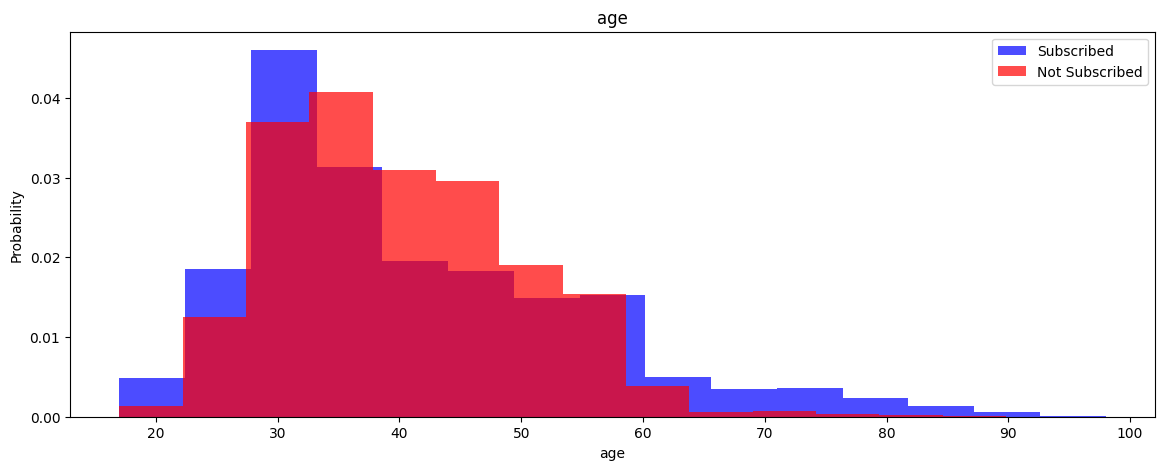

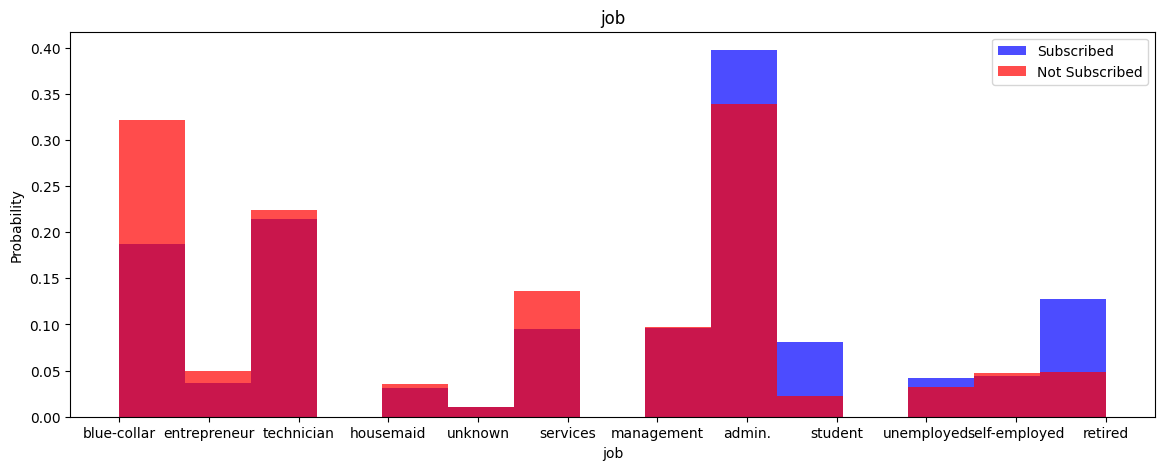

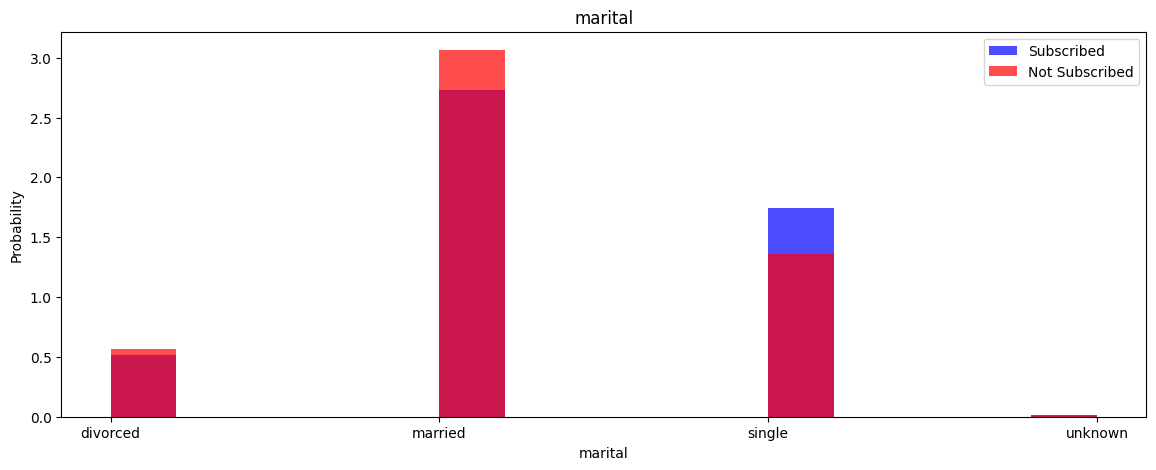

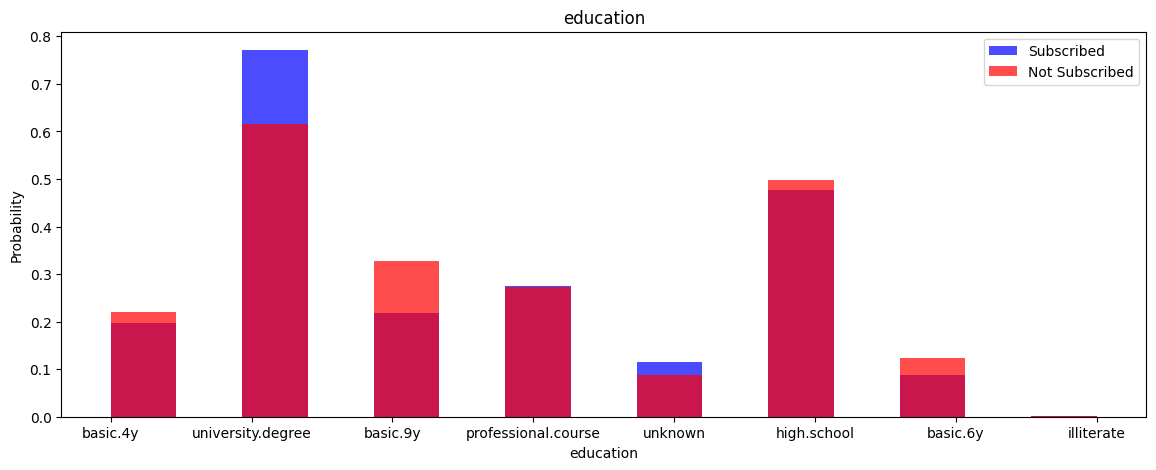

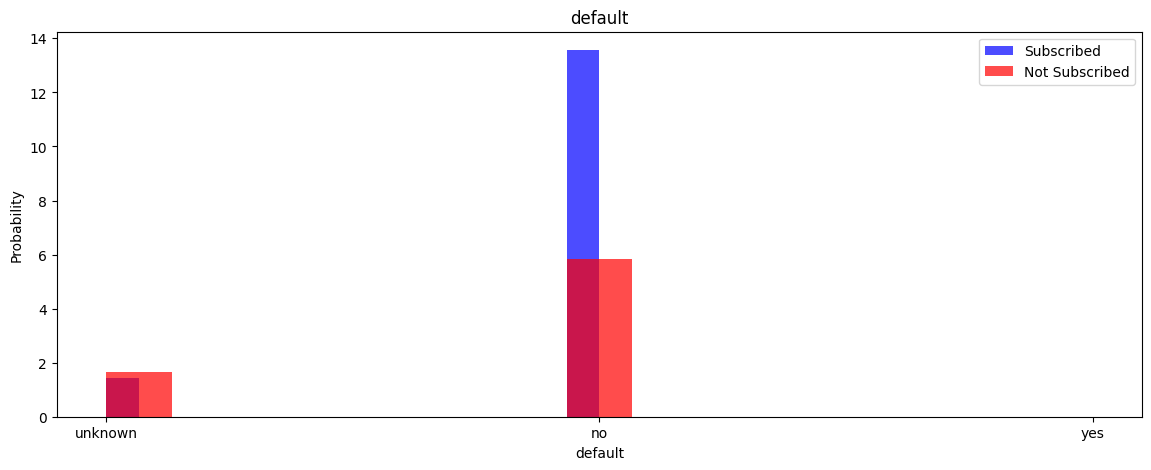

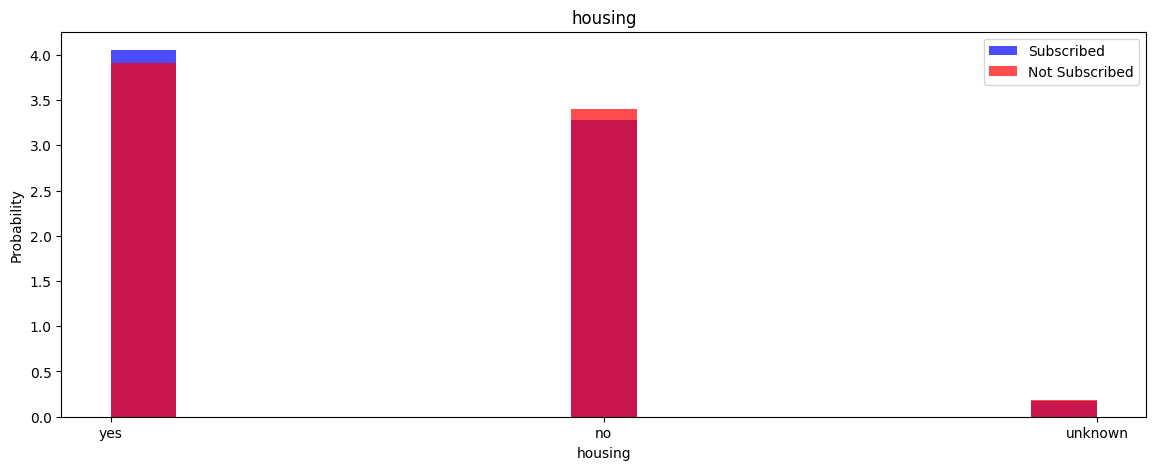

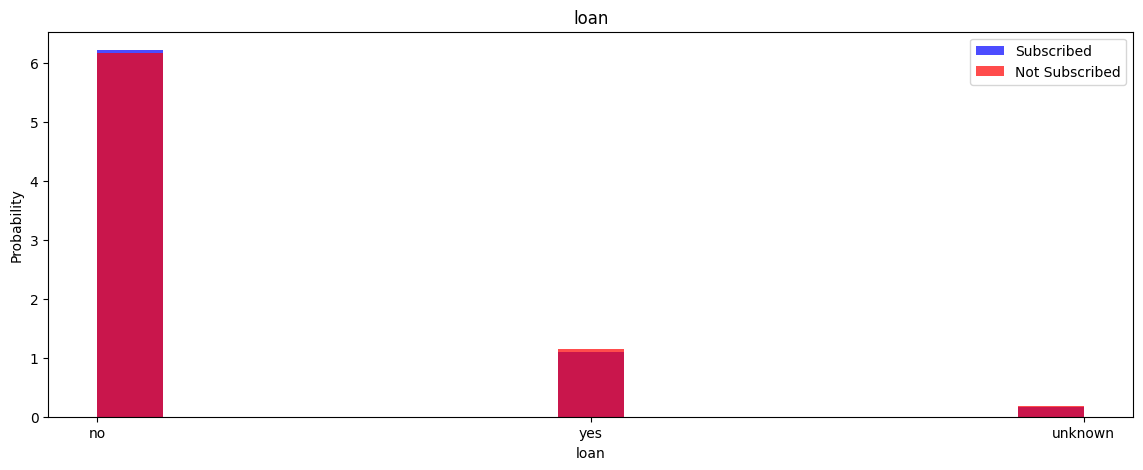

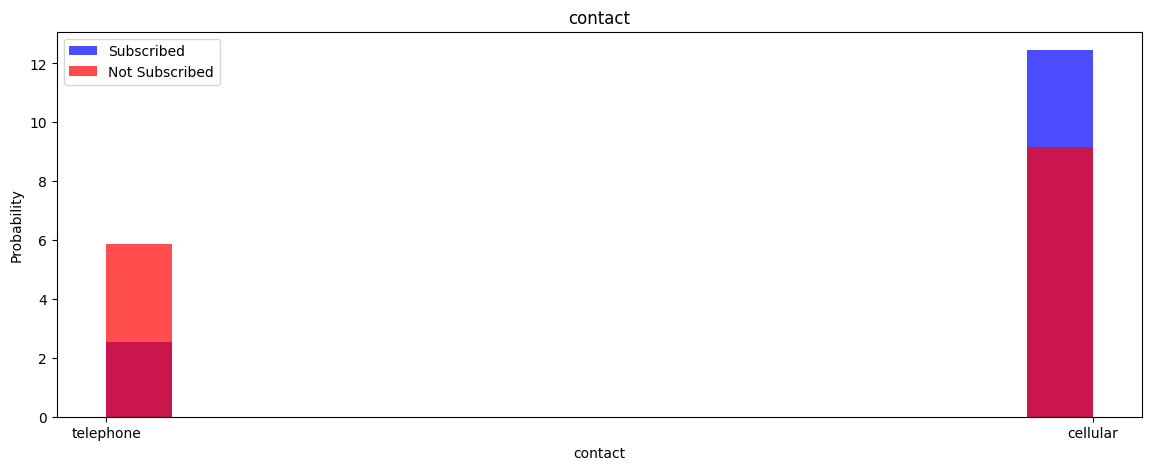

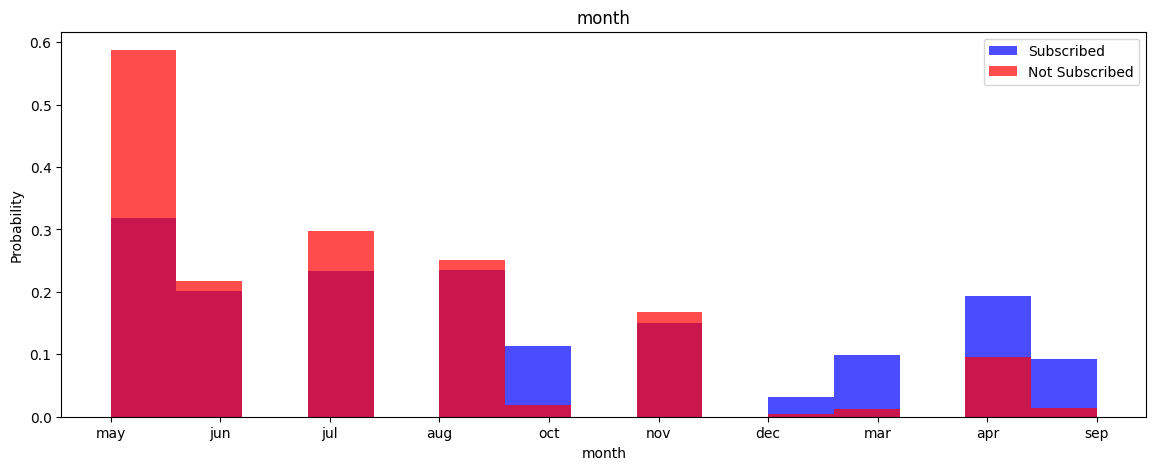

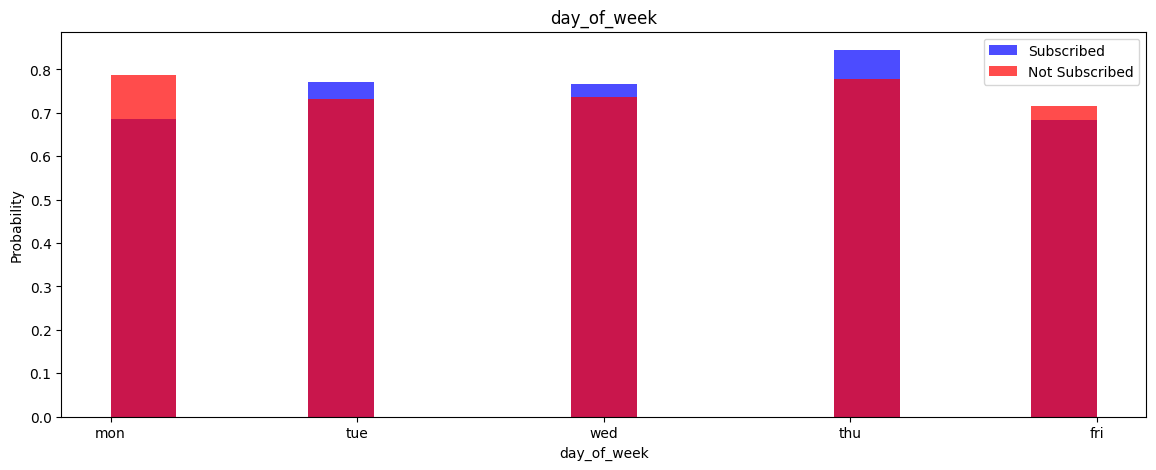

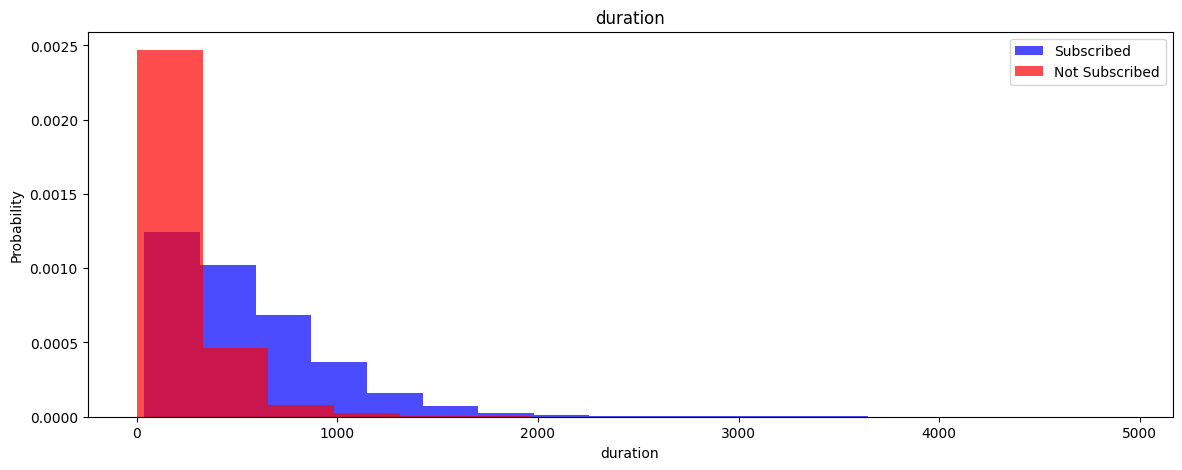

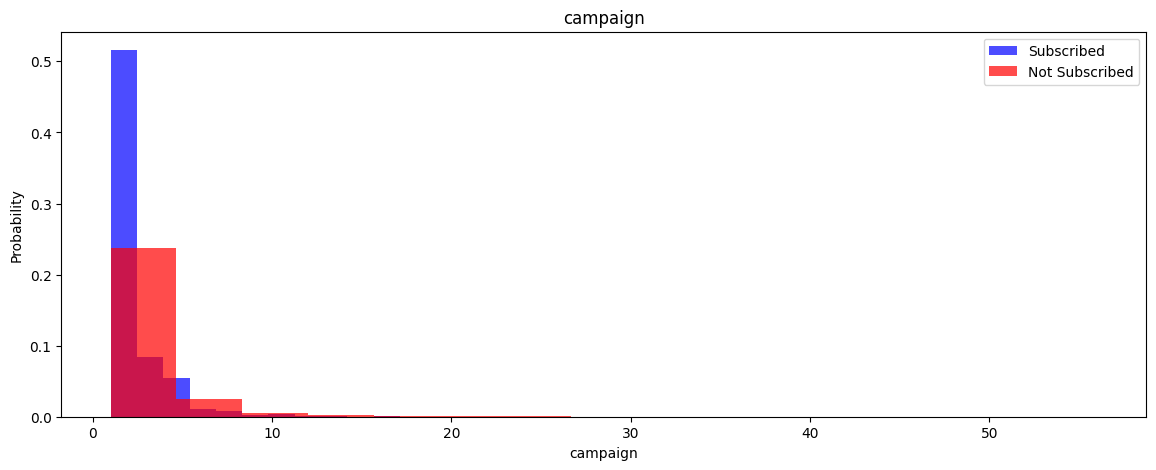

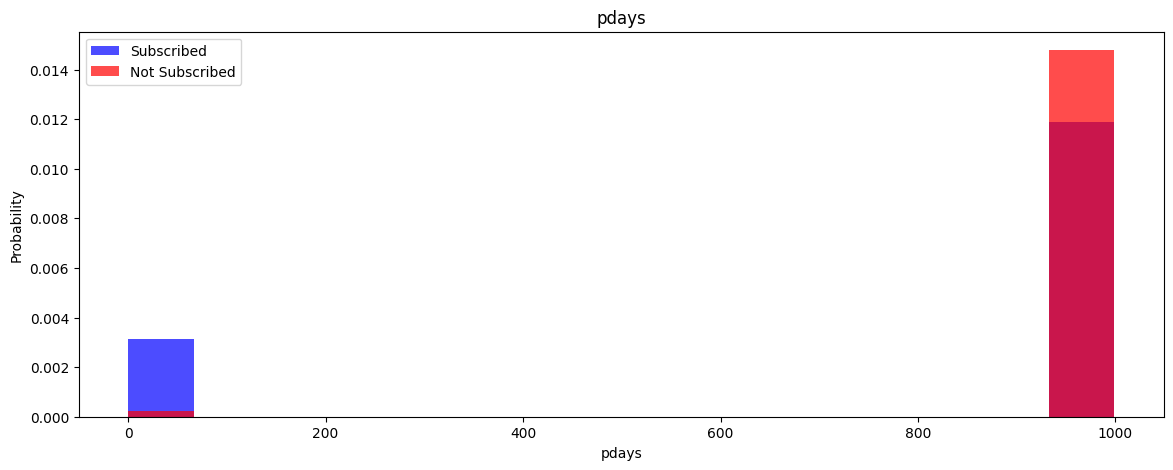

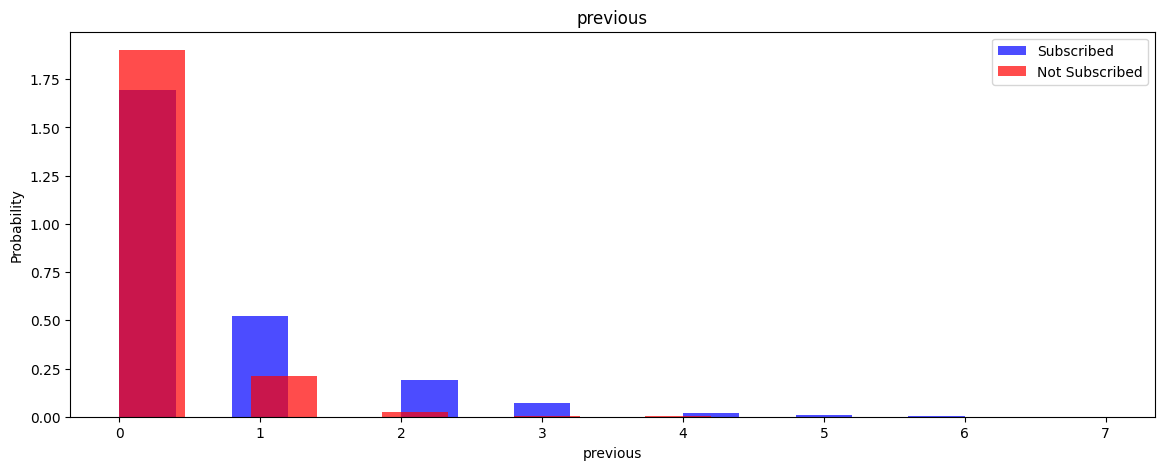

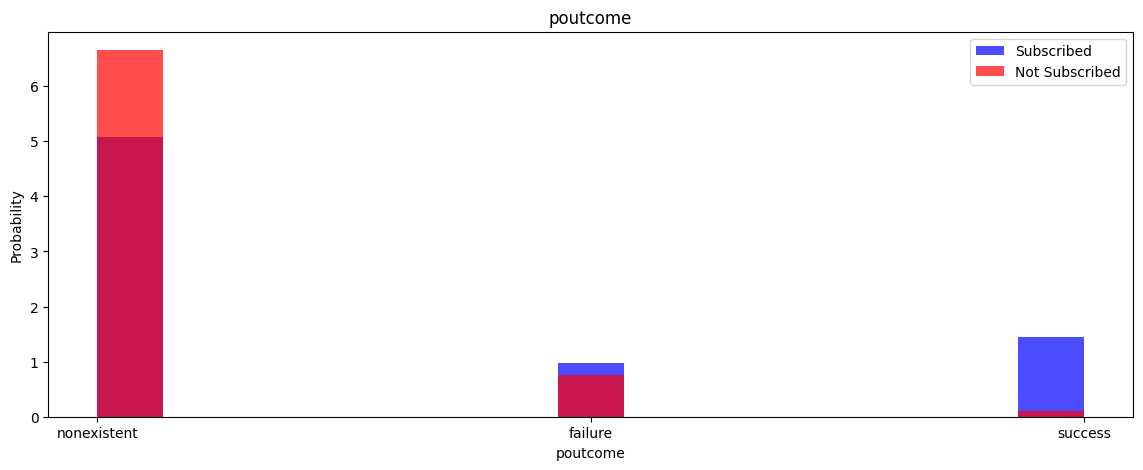

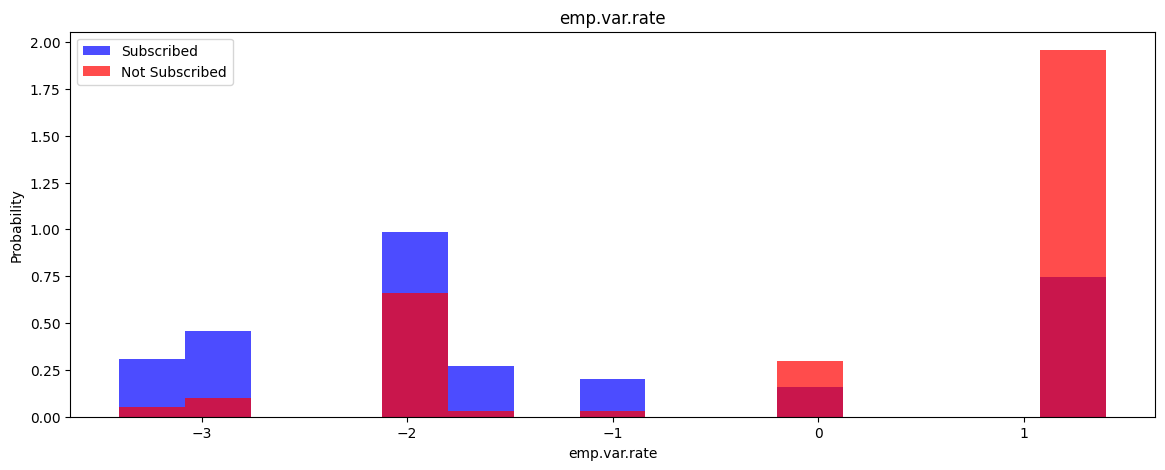

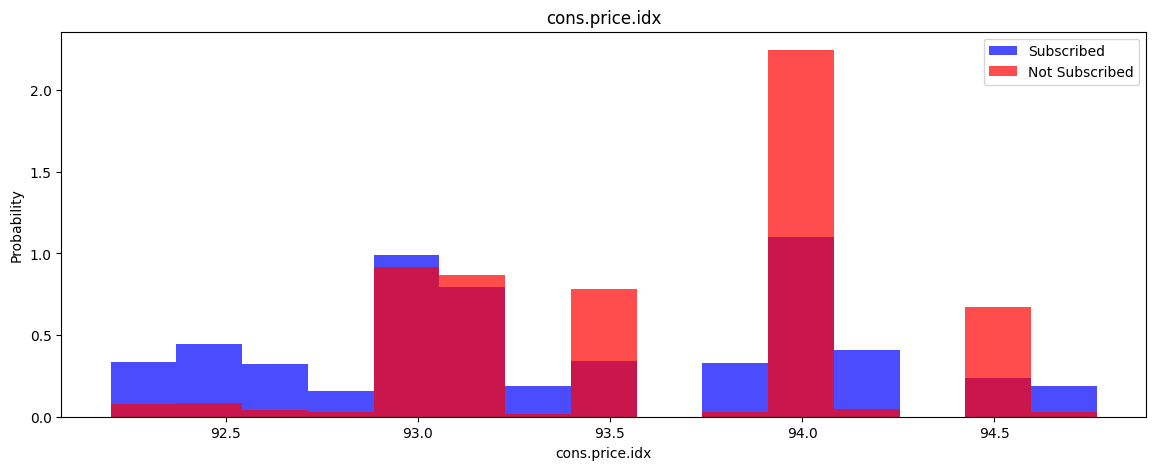

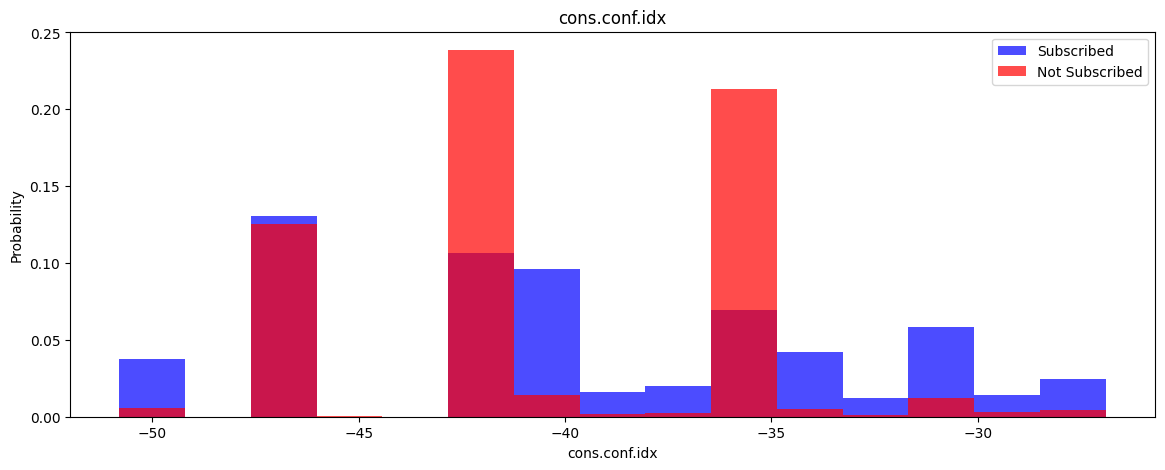

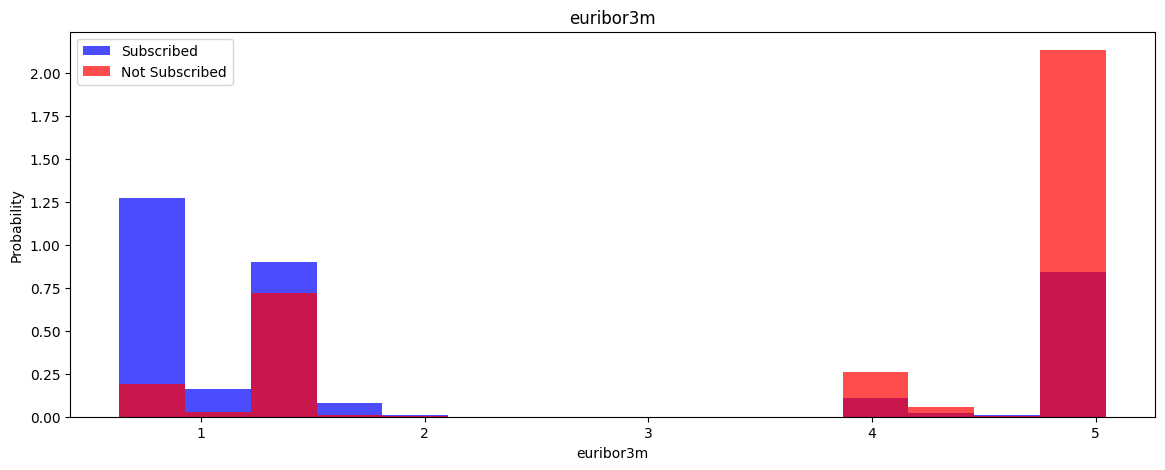

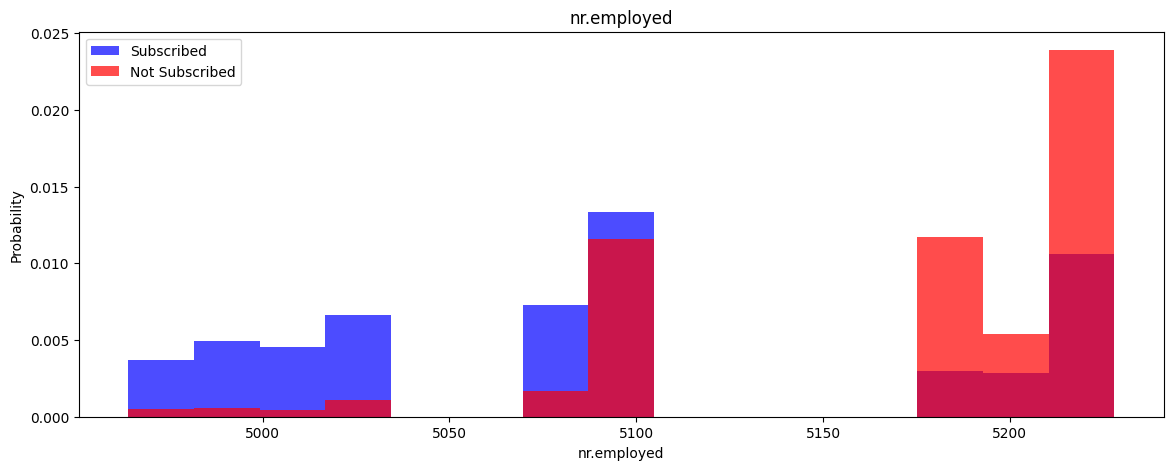

In [8]:
#  visualize the distribution of each feature (column) in the dataset df, separated by the target variable y
# ('yes' for subscribed, 'no' for not subscribed)
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.figure(figsize=(14,5))
  plt.hist(df[df['y']=='yes'][label], color='blue', label="Subscribed", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['y']=='no'][label], color='red', label="Not Subscribed", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

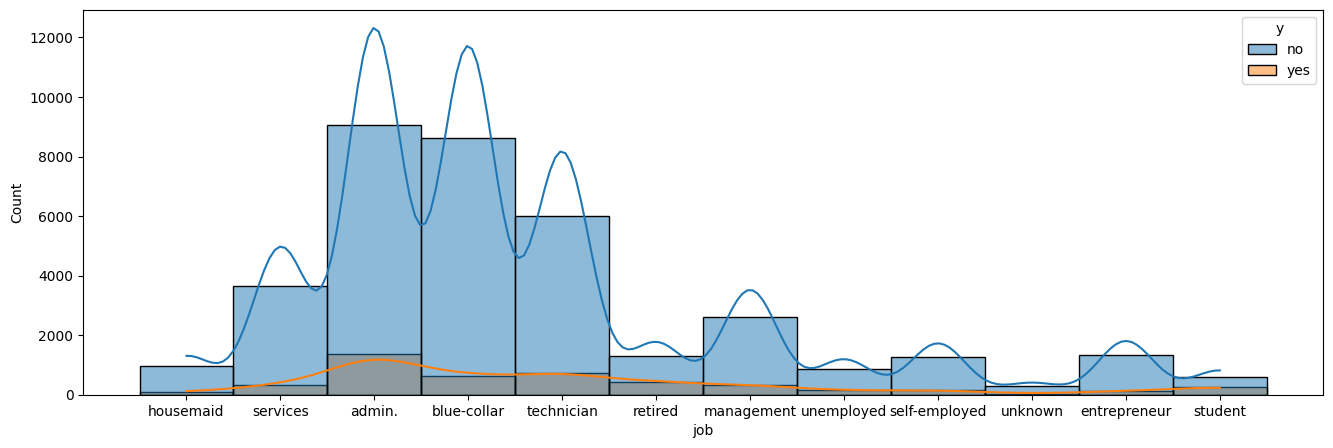

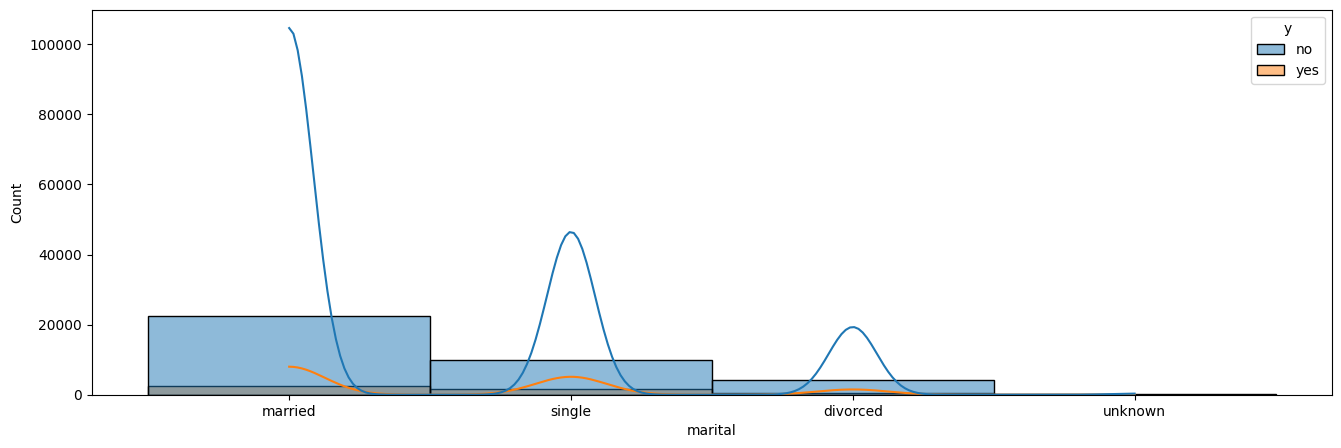

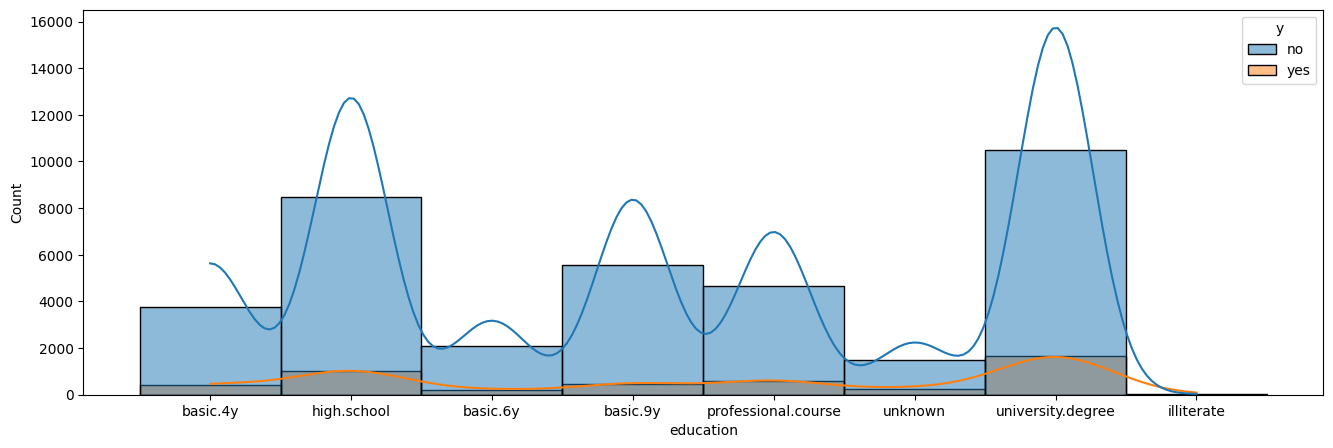

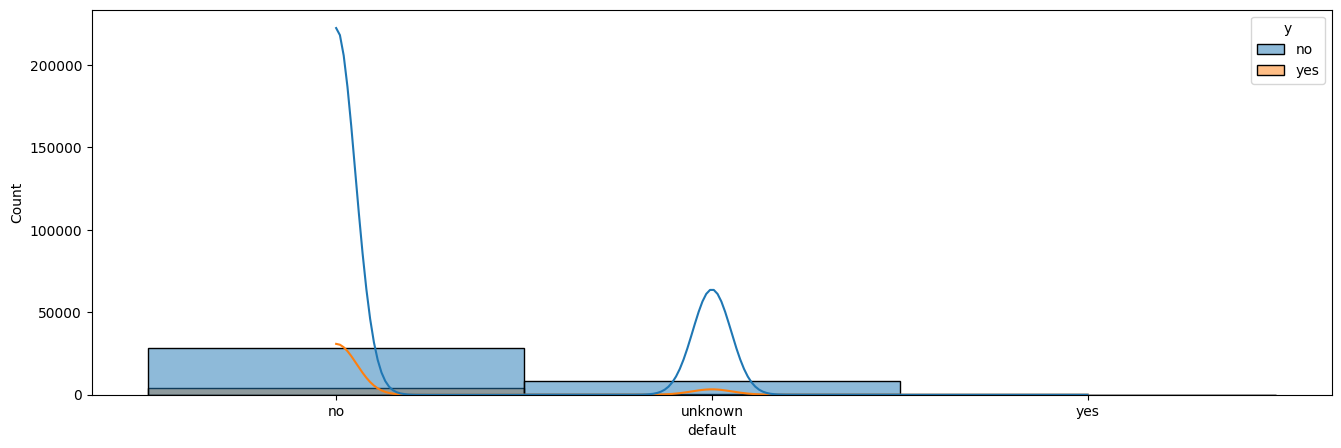

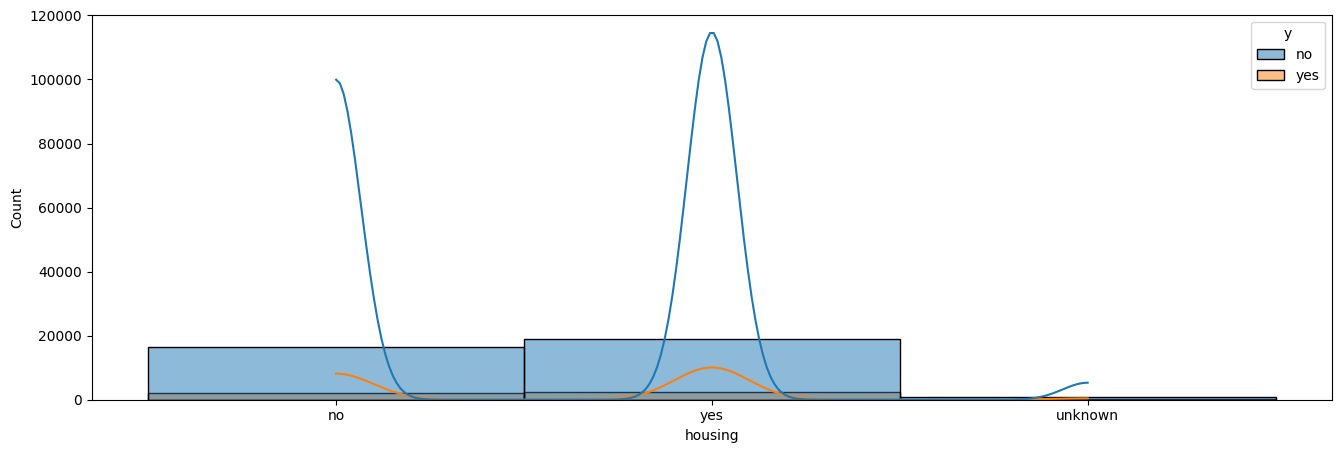

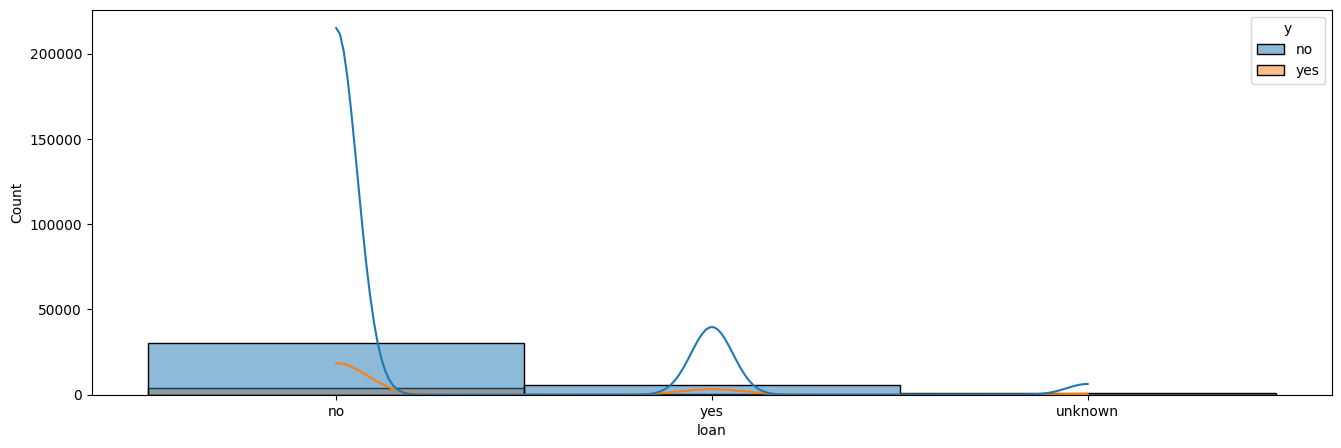

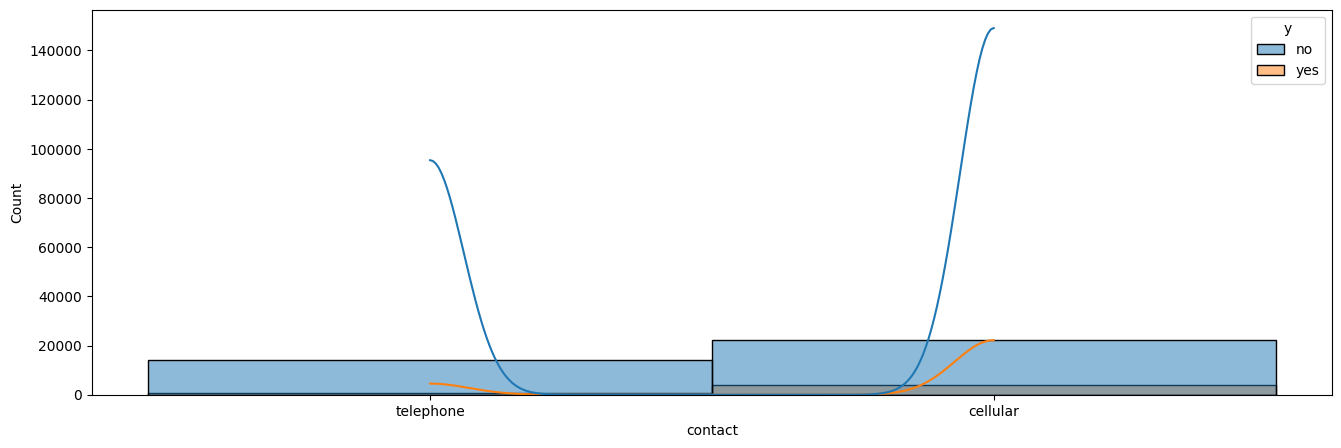

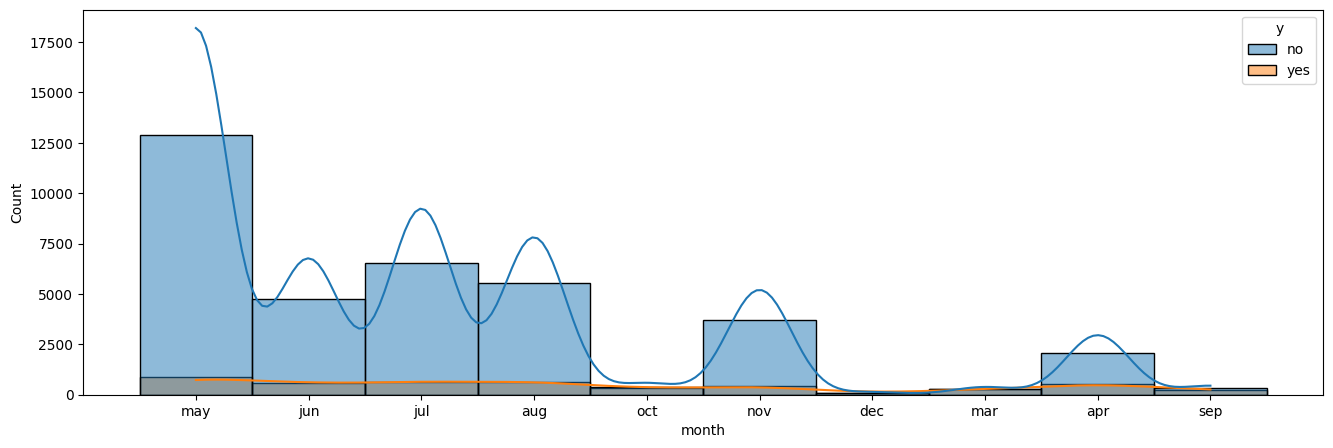

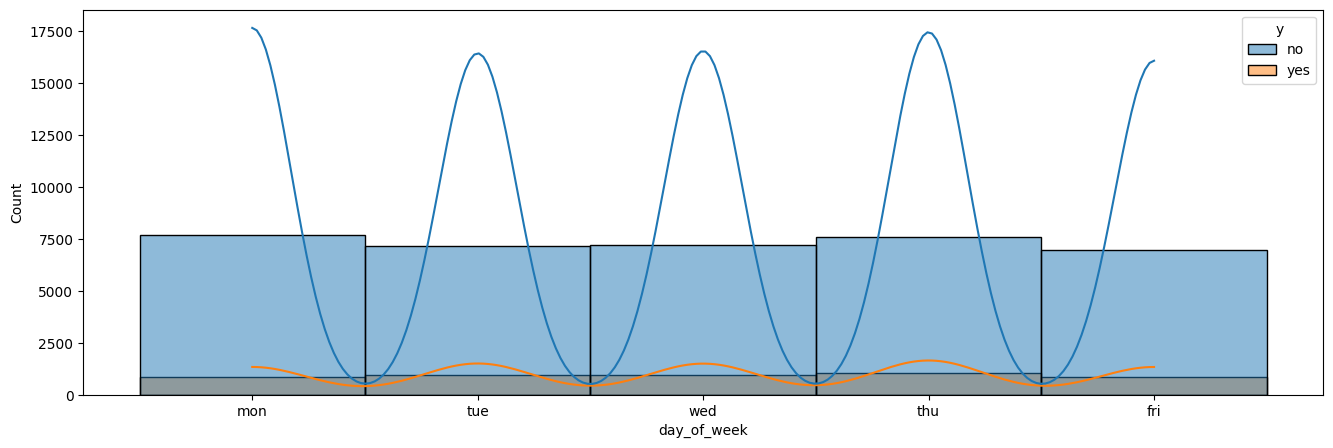

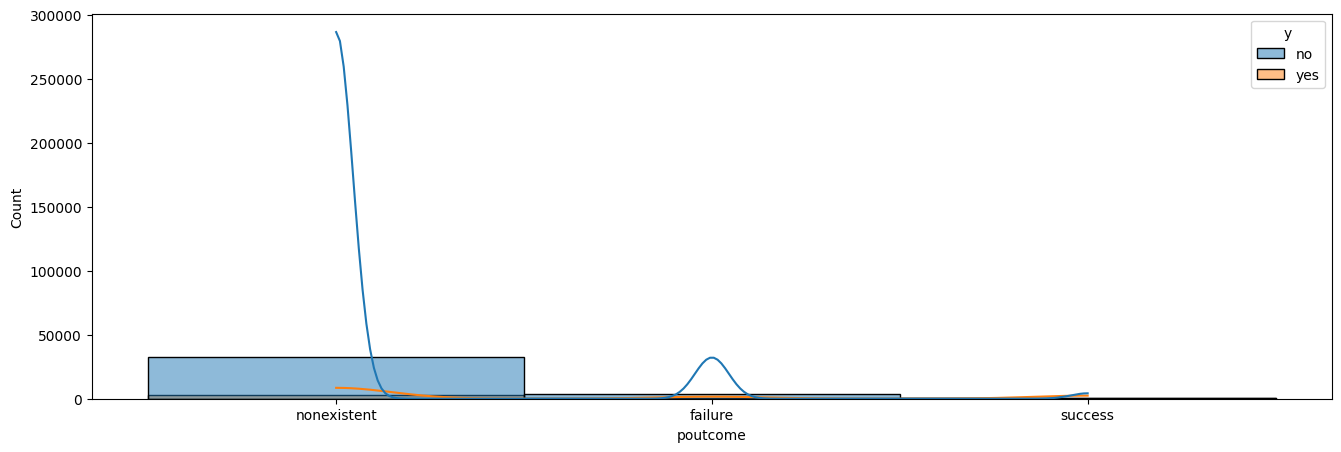

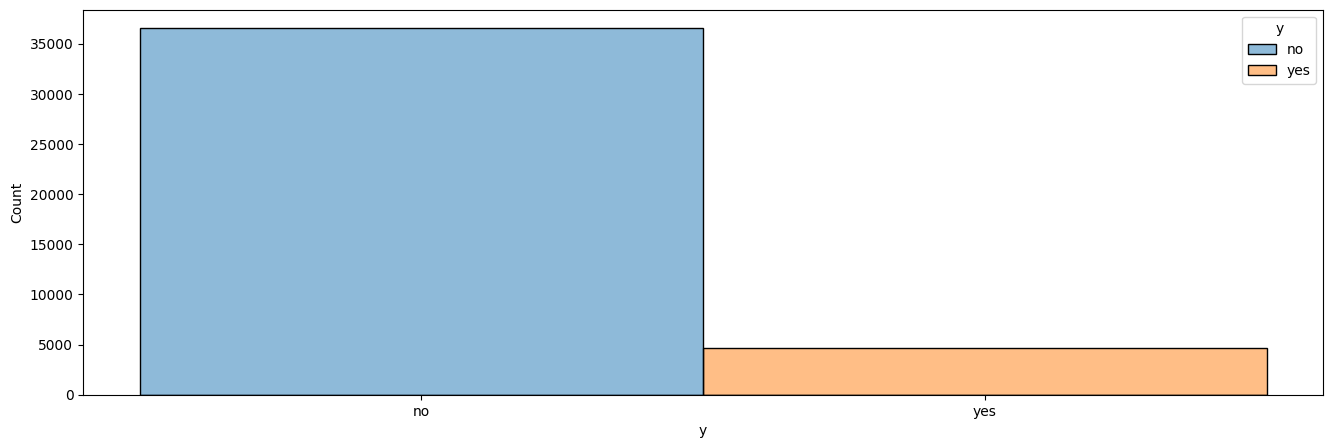

In [9]:
# Histogram to understand the distribution categorical data within the dataset
for i in df.select_dtypes(include='object').columns:
  plt.figure(figsize=(16,5))
  sns.histplot(data = df, x = i, kde=True, hue= "y")
  plt.show()

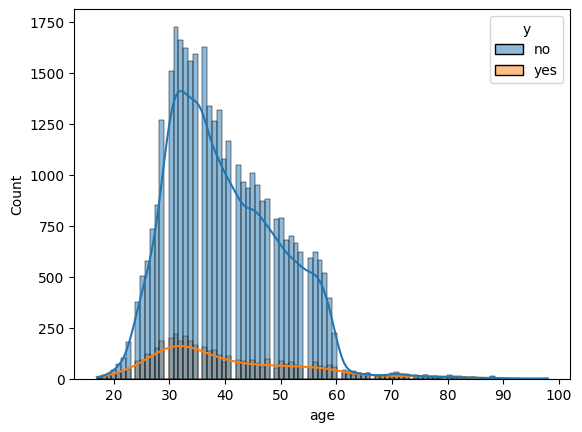

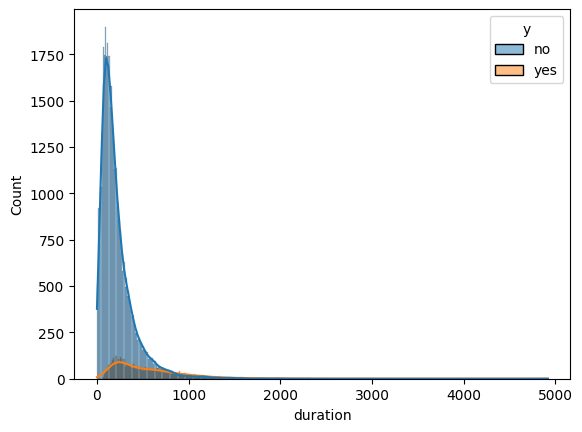

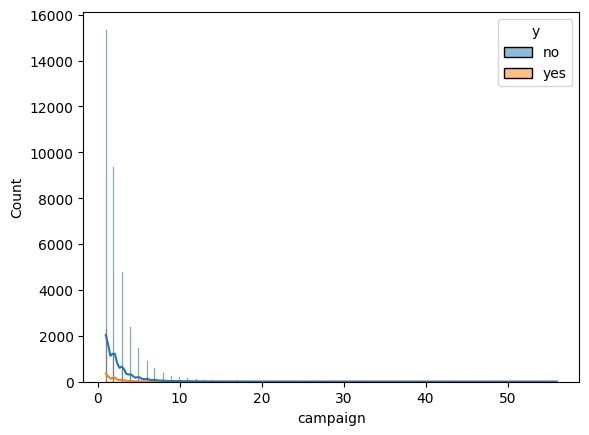

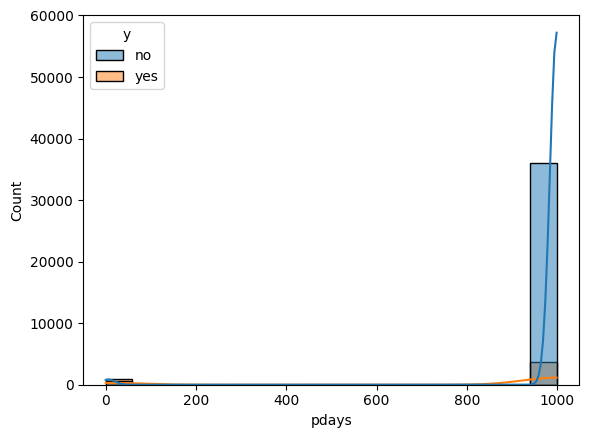

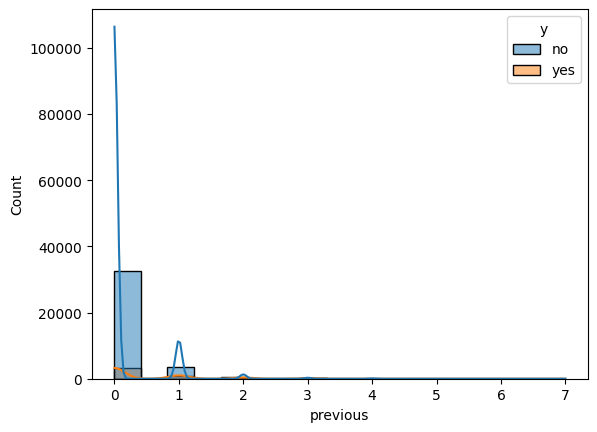

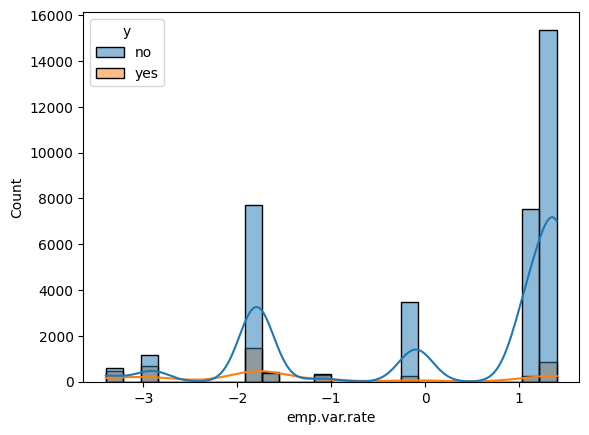

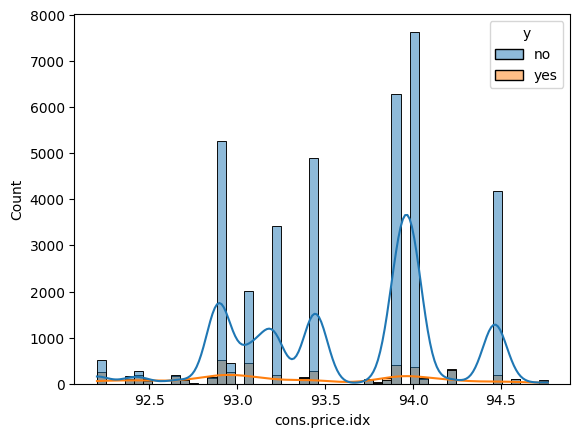

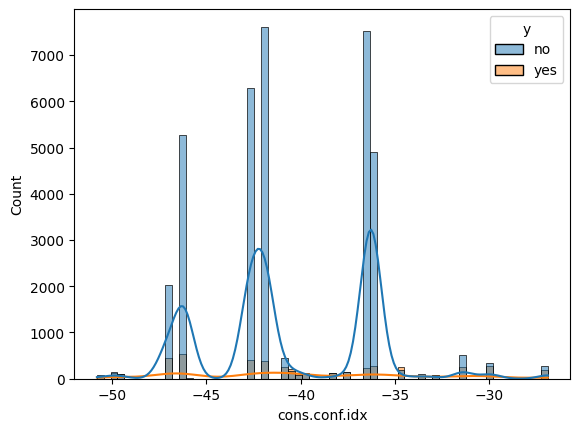

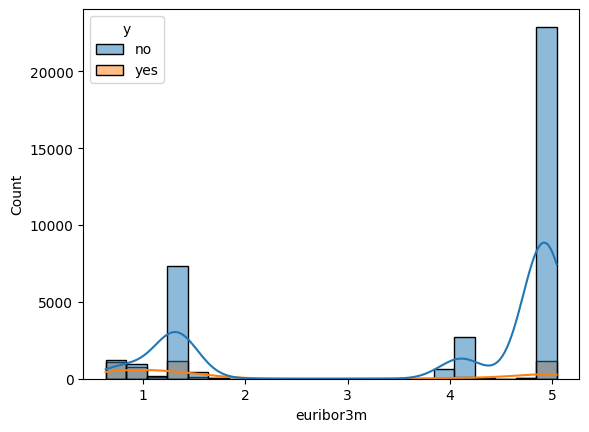

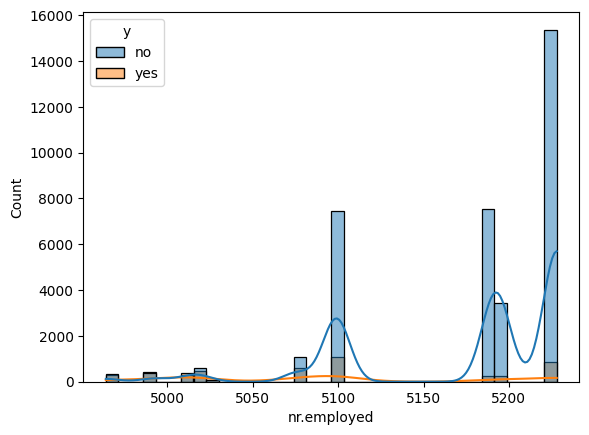

In [10]:
# Histogram to understand the distribution numerical data within the dataset
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data = df, x = i, kde=True, hue= "y")
  plt.show()

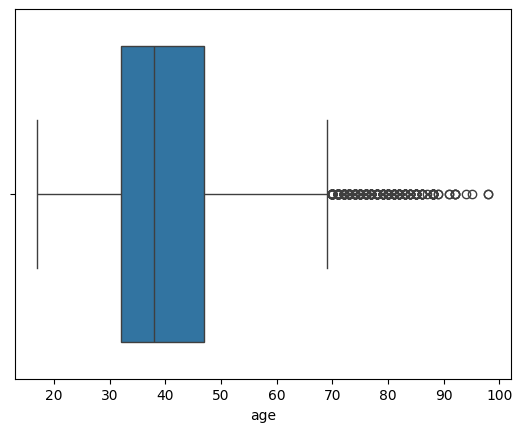

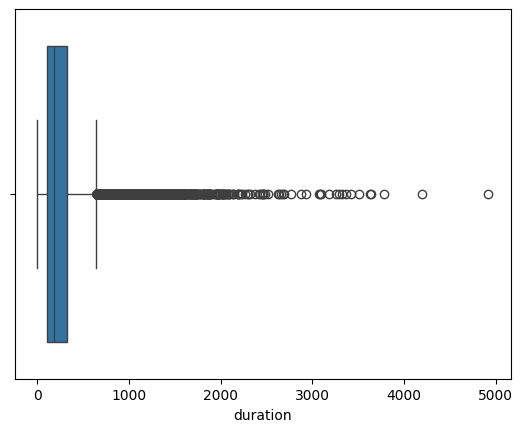

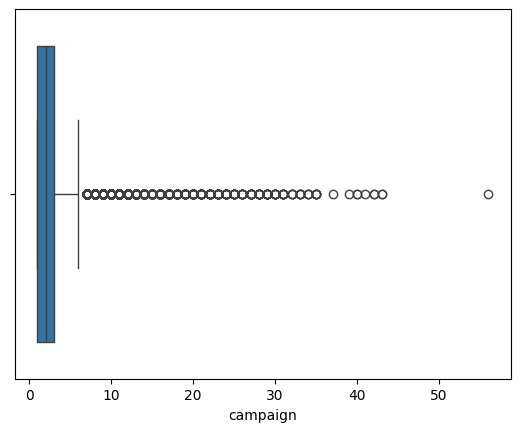

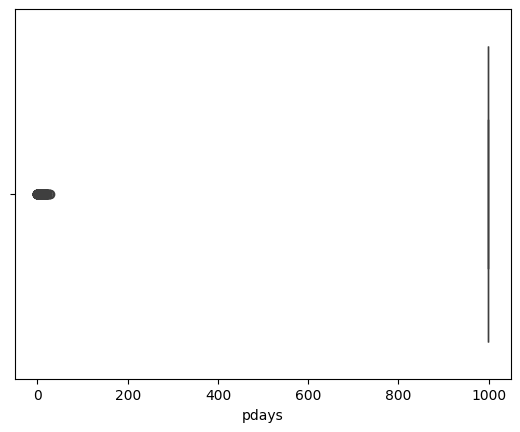

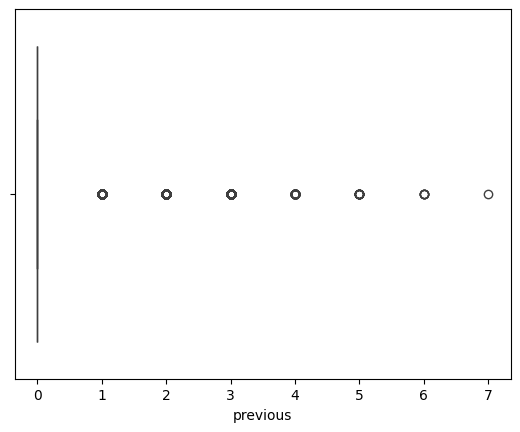

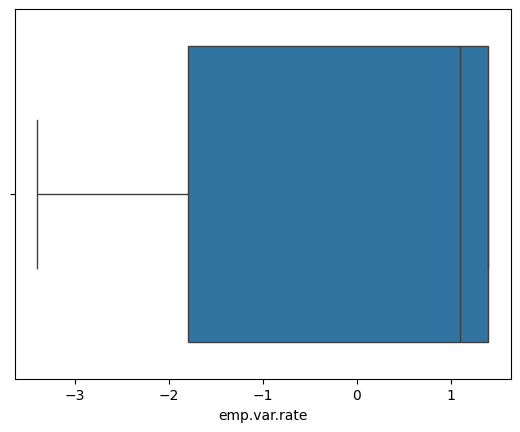

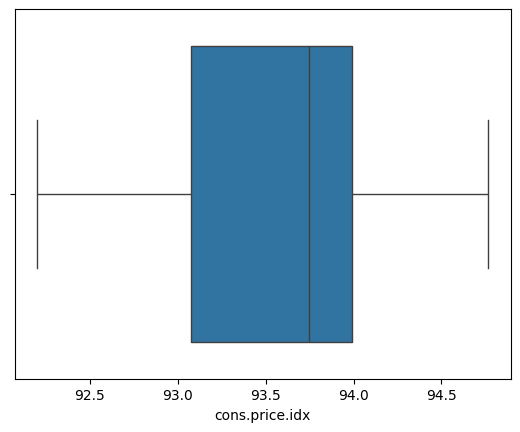

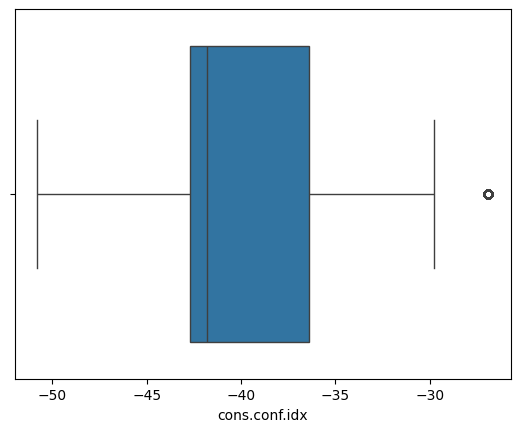

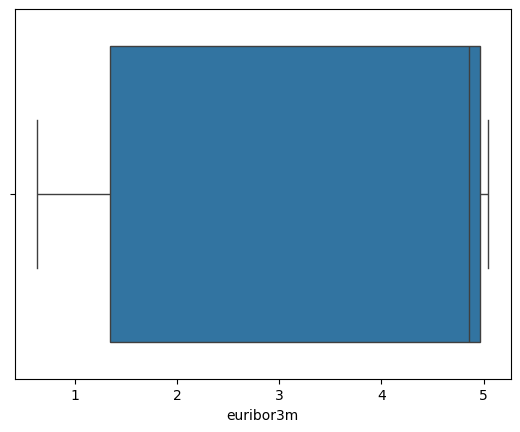

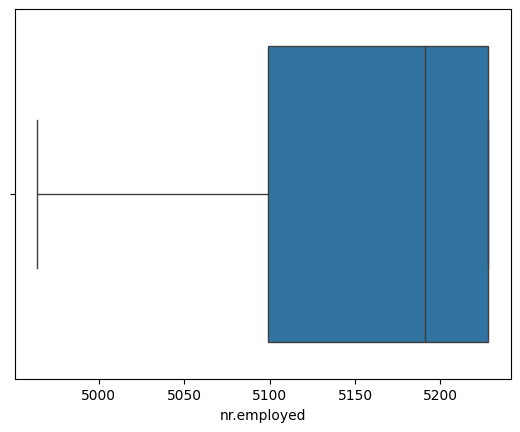

In [11]:
# Boxplot to identify the Outliers in the dataset
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data = df, x = i)
  plt.show()

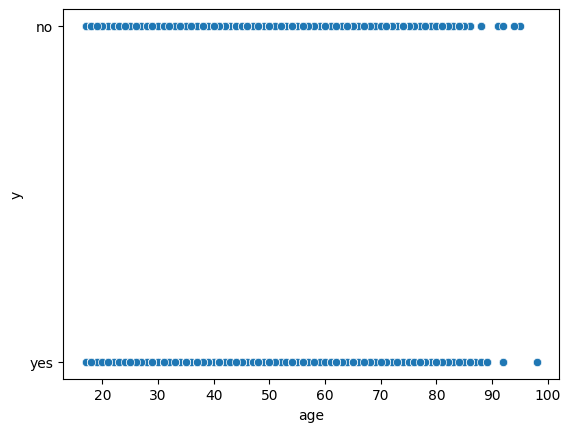

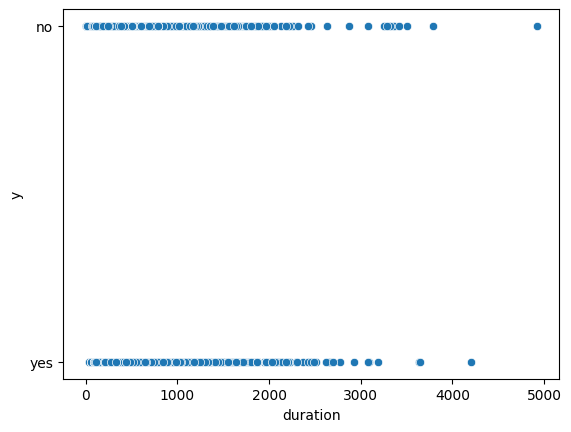

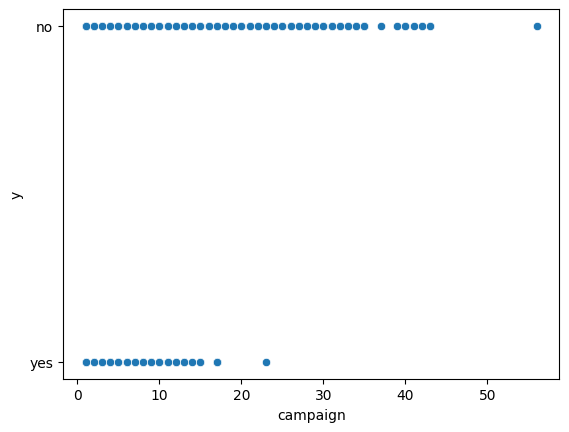

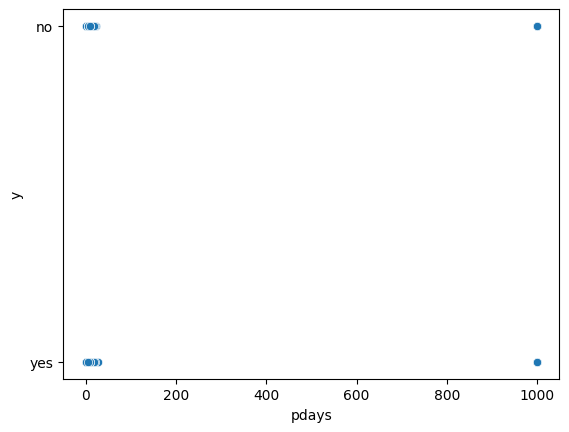

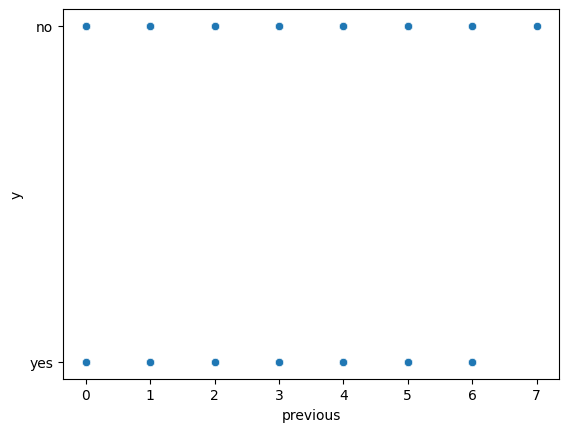

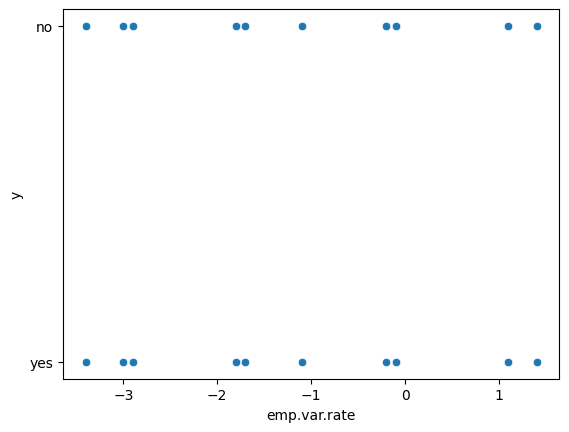

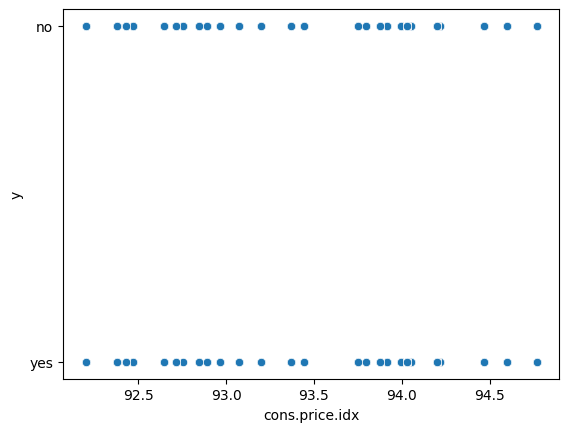

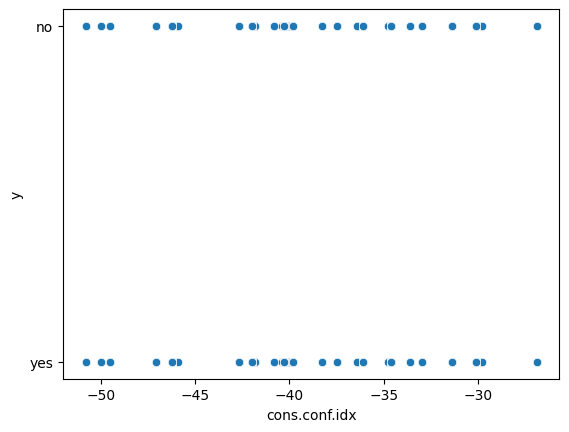

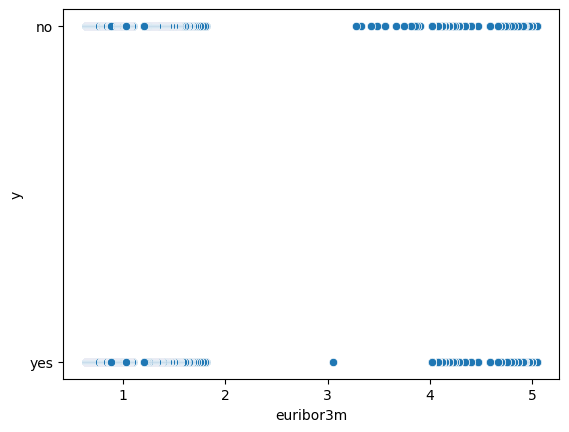

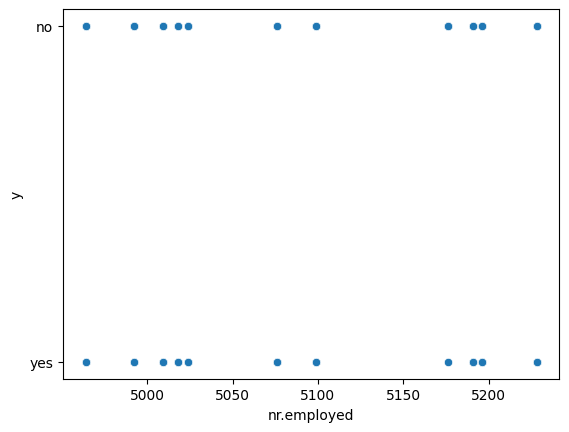

In [12]:
# Scatter plot to understand the relationship
for i in ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
       sns.scatterplot(data = df, x = i, y = 'y')
       plt.show()

In [13]:
# Correalation with heatmap to interpret the relation and multicilliniarity between the numerical features in the dataset
df.select_dtypes(include='number').corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017521
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044678
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144012
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372314
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501122
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.907246
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522452
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.101302
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945554
nr.employed,-0.017521,-0.044678,0.144012,0.372314,-0.501122,0.907246,0.522452,0.101302,0.945554,1.000000


<Axes: >

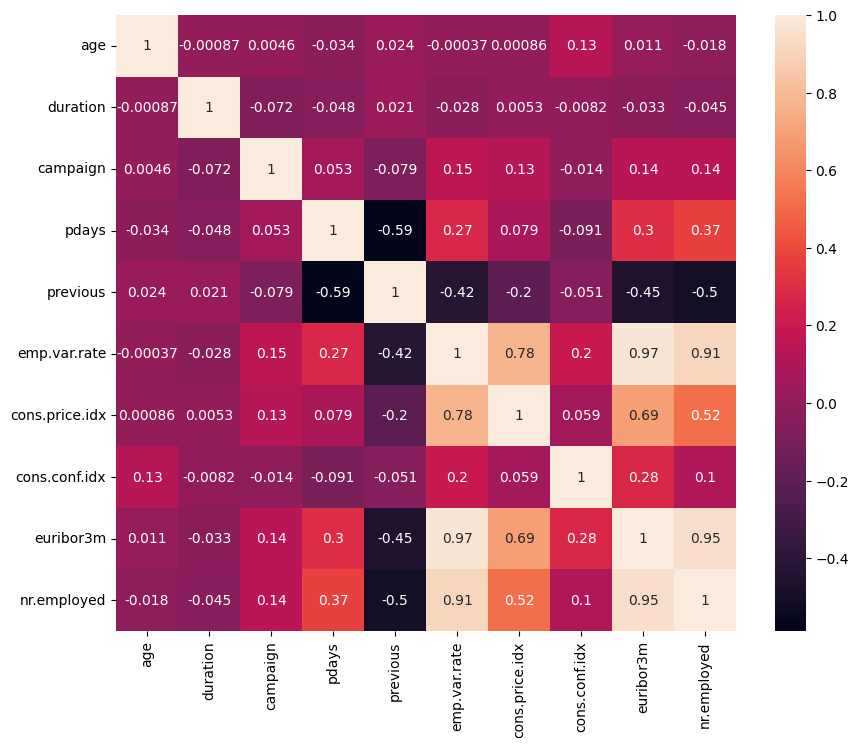

In [14]:
# Plot the correlations of them
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True)

# **Missing Value Treatments & Duplicates handling**

In [15]:
# Finding whether there are missing values
df.isnull().sum()   # No Missing values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


No Missing Values

In [16]:
# Finding Duplicates
df.duplicated().sum()   # 12 Duplicates

12

In [17]:
#Investigating these 12 duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5196,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099,no


In [18]:
# Create a copy of the dataset
new_df = df.copy()

In [19]:
# Check for duplicate data
print("Duplicate values, before handling: ", new_df.duplicated().sum())

# If there are, handle duplicate valuse and garbage values
new_df = new_df.drop_duplicates()

# Check for duplicate data
print("Duplicate values, after handling: ", new_df.duplicated().sum())

Duplicate values, before handling:  12
Duplicate values, after handling:  0


In [20]:
# To handle 'unknown' data with columns, by using RandomForest Classifier

# Function to perform model-based imputation
def model_based_imputation(data, unknown_label='unknown', model=RandomForestClassifier(random_state=42)):
    # Identify columns with 'unknown' values
    columns_with_unknown = [col for col in data.columns if data[col].dtype == 'object' and (data[col] == unknown_label).any()]

    # Initialize LabelEncoders for categorical features
    label_encoders = {}
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le

    # Iterate through each column with 'unknown'
    for col in columns_with_unknown:
        print(f"Imputing missing values for: {col}")

        # Split data into known and unknown
        known_data = data[data[col] != label_encoders[col].transform([unknown_label])[0]]
        unknown_data = data[data[col] == label_encoders[col].transform([unknown_label])[0]]

        if unknown_data.empty:
            continue  # Skip if no unknown values exist

        # Define predictors (exclude the target column)
        predictors = [c for c in data.columns if c != col]

        # Train the model on known data
        clf = model
        clf.fit(known_data[predictors], known_data[col])

        # Predict missing values for unknown data
        data.loc[data[col] == label_encoders[col].transform([unknown_label])[0], col] = clf.predict(unknown_data[predictors])

    # Inverse transform the labels back to original form
    for col, le in label_encoders.items():
        data[col] = le.inverse_transform(data[col])

    return data

data_imputed = model_based_imputation(new_df)
new_df = data_imputed

Imputing missing values for: job
Imputing missing values for: marital
Imputing missing values for: education
Imputing missing values for: default
Imputing missing values for: housing
Imputing missing values for: loan


# **Outlier Treatment**

In [21]:
# Method to find out the lower and upper wiskers of specific features
def wisker(col):
  q1 , q3 = np.percentile(col,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  return lower_bound, upper_bound

# Z- score method to identify upper/lower limits
def z_score(col):
  mean = np.mean(col)
  std = np.std(col)
  lower_bound = mean - 3 * std
  upper_bound = mean + 3 * std
  return lower_bound, upper_bound

# Method to take the outliers and set those outliers to the upper/lower wiskers/bounds
def outlier_treatment(col,lower_bound, upper_bound):
   col = np.where(col > upper_bound, upper_bound, col)
   col = np.where(col < lower_bound, lower_bound, col)
   return col

**Age:**
* Outliers: Values closer to the maximum (e.g., above 80) might be rare but plausible.
* Treatment: Consider the domain relevance—elderly clients might behave differently in marketing contexts, so retaining these values might be meaningful.

**Duration:**
* Outliers: Very high values (e.g., above 1000) might skew the analysis.
* Note: Since this variable influences the target (y) but is not usable for prediction in a realistic model, consider excluding this column from modeling.

**Campaign:**
* Outliers: Extremely high values (e.g., above 10) might be unusual.
* Treatment: Analyze how frequently high values occur and their impact. Cap extreme values if they are rare or irrelevant.

**Pdays:**
* Outliers: Since 999 is a placeholder and highly frequent, consider it separately. Other values closer to 0 might be valid.
* Treatment: Replace 999 with a distinct indicator variable to avoid skewing numerical analysis.

**Previous:**
* Outliers: High values (e.g., 6 or 7) might be rare but valid.
* Treatment: Check for meaningful trends or patterns; capping may not be necessary.

**Emp.var.rate:**
* Outliers: Low values (e.g., below -2) might indicate economic downturns.
* Treatment: Retain all values unless they are errors; this variable likely has meaningful context.

**Cons.price.idx:**
* Outliers: Unlikely due to the small variance.
* Treatment: Likely no need for outlier treatment.

**Cons.conf.idx:**
* Outliers: Values closer to -50.8 or -26.9 might be rare.
* Treatment: Assess if these values affect relationships; likely retain all values.

**Euribor3m:**
* Outliers: Low values (e.g., below 1) might occur during specific financial conditions.
* Treatment: Retain unless they indicate data errors.

**Nr.employed:**
* Outliers: Low values (e.g., below 5000) might reflect specific scenarios.
* Treatment: Retain unless domain knowledge suggests otherwise.





In [22]:
# limits for campaign
lower_bound, upper_bound = wisker(new_df['campaign'])
print(f"Lower bound for campaign: {lower_bound}")
print(f"Upper bound for campaign: {upper_bound}")

# Find outliers in campaign
new_df.loc[(new_df['campaign'] > upper_bound) | (new_df['campaign'] < lower_bound)]


Lower bound for campaign: -2.0
Upper bound for campaign: 6.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
1043,41,technician,single,university.degree,no,no,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
1097,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic.9y,no,no,no,telephone,sep,fri,...,9,999,1,failure,-1.1,94.199,-37.5,0.883,4964,no
40631,88,retired,married,basic.4y,no,yes,no,cellular,sep,mon,...,7,999,0,nonexistent,-1.1,94.199,-37.5,0.882,4964,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,...,7,3,5,success,-1.1,94.199,-37.5,0.879,4964,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,...,9,999,2,failure,-1.1,94.199,-37.5,0.879,4964,no


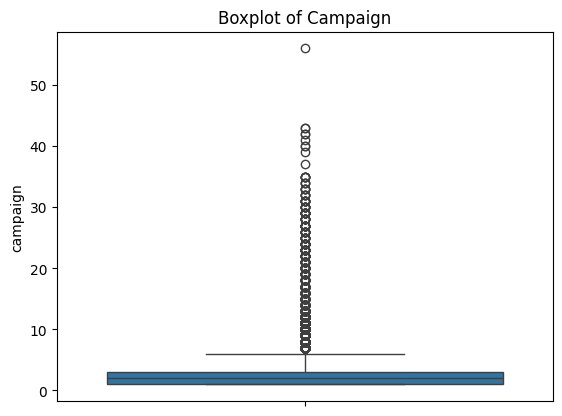

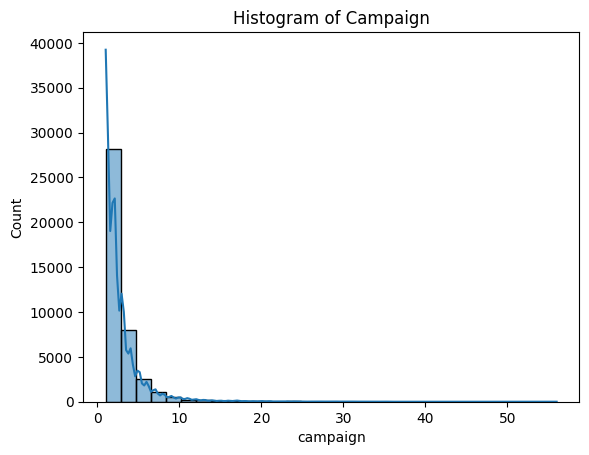

In [23]:
# "campaign" column in DataFrame
sns.boxplot(data=new_df['campaign'])
plt.title('Boxplot of Campaign')
plt.show()

sns.histplot(data=new_df['campaign'], kde=True, bins=30)
plt.title('Histogram of Campaign')
plt.show()

In [24]:
# Sample 'campaign' column
campaign_col = new_df['campaign']

# Step 1: Calculate boundaries using both methods
# Whisker method
wisker_lower, wisker_upper = wisker(campaign_col)

# Z-score method
z_lower, z_upper = z_score(campaign_col)

# Step 2: Compare boundaries
print(f"Whisker Boundaries: Lower={wisker_lower}, Upper={wisker_upper}")
print(f"Z-score Boundaries: Lower={z_lower}, Upper={z_upper}")

# Step 3: Choose the appropriate method
# We'll use the whisker method if the data has a skewed distribution, as it is more robust to non-normal data.
# Use Z-score if the data is approximately normal.
chosen_lower, chosen_upper = (wisker_lower, wisker_upper) if campaign_col.skew() > 1 else (z_lower, z_upper)
print(f"Chosen Boundaries: Lower={chosen_lower}, Upper={chosen_upper}")

# Step 4: Apply outlier treatment
# Using whisker or Z-score boundaries
new_df['campaign_outlier_treated'] = outlier_treatment(
    campaign_col, chosen_lower, chosen_upper
)

# Step 5: Verify the results
print("Before Outlier Treatment:")
print(campaign_col.describe())
print("\nAfter Outlier Treatment:")
print(new_df['campaign_outlier_treated'].describe())

# Count the number of occurrences for each capped campaign group
capped_counts = new_df['campaign_outlier_treated'].value_counts()
print("\nCapped Campaign Counts:")
print(capped_counts)

Whisker Boundaries: Lower=-2.0, Upper=6.0
Z-score Boundaries: Lower=-5.742974741438575, Upper=10.878733435823653
Chosen Boundaries: Lower=-2.0, Upper=6.0
Before Outlier Treatment:
count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

After Outlier Treatment:
count    41176.000000
mean         2.275476
std          1.550606
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign_outlier_treated, dtype: float64

Capped Campaign Counts:
campaign_outlier_treated
1.0    17634
2.0    10568
3.0     5340
6.0     3385
4.0     2650
5.0     1599
Name: count, dtype: int64


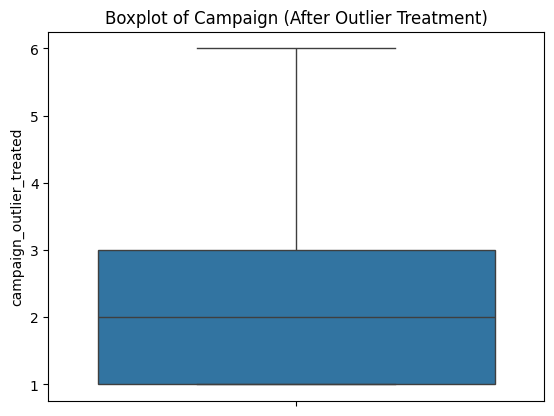

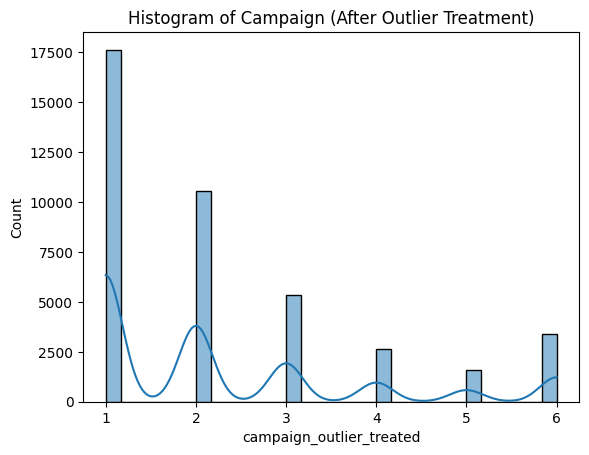

In [25]:
# Plot the boxplot to view changes
sns.boxplot(data=new_df['campaign_outlier_treated'])
plt.title('Boxplot of Campaign (After Outlier Treatment)')
plt.show()

sns.histplot(data=new_df['campaign_outlier_treated'], kde=True, bins=30)
plt.title('Histogram of Campaign (After Outlier Treatment)')
plt.show()

In [26]:
# Replace the placeholder value with -1
new_df['pdays_handled'] = new_df['pdays'].replace(999, -1)

describe = new_df['pdays_handled'].describe()
print(describe)

count    41176.000000
mean        -0.741913
std          1.510540
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max         27.000000
Name: pdays_handled, dtype: float64


In [27]:
# # Enforce the constraint: if pdays == -1, then previous = 0
# new_df.loc[new_df['pdays_handled'] == -1, 'previous'] = 0

# print("Updated DataFrame:")
# print(new_df)

In [28]:
# assert not new_df[(new_df['pdays_handled'] == -1) & (new_df['previous'] > 0)].any(axis=None), "Constraint violated!"

# affected_rows = len(new_df[new_df['pdays_handled'] == -1])
# print(f"Number of rows updated: {affected_rows}")

In [29]:
new_df['pdays_handled'].value_counts()

,count
pdays_handled,
-1,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


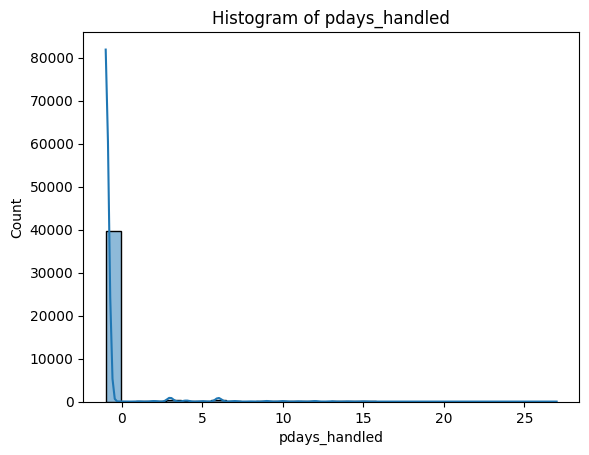

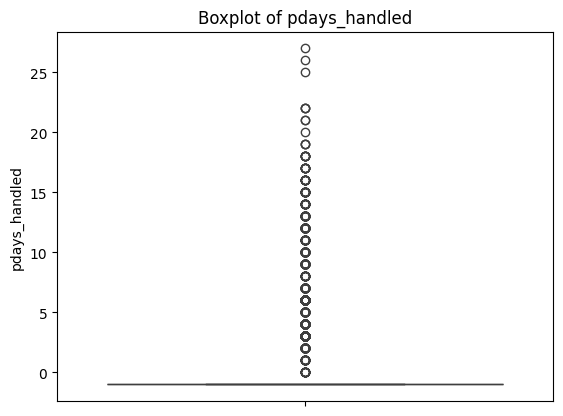

In [30]:
#plot
sns.histplot(data=new_df['pdays_handled'], kde=True, bins=30)
plt.title('Histogram of pdays_handled')
plt.show()

#boxplot
sns.boxplot(data=new_df['pdays_handled'])
plt.title('Boxplot of pdays_handled')
plt.show()

In [31]:
# # Categorize 'campaign' into specified bins
# campaign_bins = [0, 1, 3, 10, float('inf')]
# campaign_labels = ['1 contact', '2-3 contacts', '5-10 contacts', 'more than 10']
# new_df['campaign_category'] = pd.cut(new_df['campaign_outlier_treated'], bins=campaign_bins, labels=campaign_labels, right=True)

# # Categorize 'pdays' into specified bins
# pdays_bins = [-2, 0, 5, 15, new_df['pdays_handled'].max()]  # Bin edges: -2 ensures -1 is included
# pdays_labels = ['Not contacted', '1-5 days', '5-15 days', 'more than 15']
# new_df['pdays_category'] = pd.cut(new_df['pdays_handled'], bins=pdays_bins, labels=pdays_labels, right=True)

# # Categorize 'previous' into bins
# previous_bins = [-1, 0, 3, float('inf')]
# previous_labels = ['No contacts', '1-3 contacts', '4+ contacts']
# new_df['previous_category'] = pd.cut(new_df['previous'], bins=previous_bins, labels=previous_labels, right=True)

# # Group by campaign_category
# grouped_campaign = new_df.groupby('campaign_category', observed=True).size()
# print("Grouped by Campaign Categories:")
# print(grouped_campaign)

# # Group by pdays_category
# grouped_pdays = new_df.groupby('pdays_category', observed=True).size()
# print("\nGrouped by Pdays Categories:")
# print(grouped_pdays)

# # Group by previous_category
# grouped_previous = new_df.groupby('previous_category', observed=True).size()
# print("\nGrouped by Previous Categories:")
# print(grouped_previous)


In [32]:
# new_df['campaign_category'].value_counts()

In [33]:
# new_df['pdays_category'].value_counts()

In [34]:
# new_df['previous_category'].value_counts()

In [35]:
new_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign_outlier_treated,pdays_handled
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.0,-1
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.0,-1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.0,-1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.0,-1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,1.0,-1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,1.0,-1
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,2.0,-1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,1.0,-1


# **Encoding of Data**

In [36]:
# Label Encoding Categorical Features
# Identify categorical columns

categorical_cols = new_df.select_dtypes(include=['object']).columns

numerical_cols = new_df.select_dtypes(include=['number']).columns

new_categorical_cols = new_df.select_dtypes(include=['category']).columns

# Print the identified columns
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(new_categorical_cols)

categorical_cols = list(categorical_cols) + list(new_categorical_cols)
categorical_cols

Categorical Columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Numerical Columns:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_outlier_treated', 'pdays_handled'],
      dtype='object')

Categorical Columns:
Index([], dtype='object')


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [37]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le  # Save the encoder for future use (e.g., inverse_transform)

In [38]:
print(new_df.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  ...  previous  poutcome  emp.var.rate  cons.price.idx  \
0            1  ...         0         1           1.1          93.994   
1            1  ...         0         1           1.1          93.994   
2            1  ...         0         1           1.1          93.994   
3            1  ...         0         1           1.1          93.994   
4            1  ...         0         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  campaign_outlier_treated  \
0          -36.4      4.857         5

In [39]:
# from sklearn.model_selection import KFold

# def leave_one_out_encoding(df, feature, target):
#     encoded_values = []
#     for train_idx, test_idx in KFold(n_splits=5, shuffle=True).split(df):
#         train, test = df.iloc[train_idx], df.iloc[test_idx]
#         means = train.groupby(feature)[target].mean()
#         encoded_values.append(test[feature].map(means))
#     return pd.concat(encoded_values)

# # Apply Leave-One-Out encoding
# for feature in ['job', 'marital', 'education']:
#     new_df[f"{feature}_loo_encoded"] = leave_one_out_encoding(new_df, feature, 'y')

# # Drop the original categorical columns if needed
# new_df.drop(columns=['job', 'marital', 'education'], inplace=True)

# new_df


In [40]:
new_df['housing'].value_counts()

,count
housing,
1,22118
0,19058


In [41]:
# Identifying encoded map values with the assigned value sequentially
for col in categorical_cols:
    print(col)
    for label, encoded_value in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)):
        print(f"{label}: {encoded_value}")  # Print label and encoded value together
    print("***" * 10)
    print()

job
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
******************************

marital
divorced: 0
married: 1
single: 2
******************************

education
basic.4y: 0
basic.6y: 1
basic.9y: 2
high.school: 3
illiterate: 4
professional.course: 5
university.degree: 6
******************************

default
no: 0
yes: 1
******************************

housing
no: 0
yes: 1
******************************

loan
no: 0
yes: 1
******************************

contact
cellular: 0
telephone: 1
******************************

month
apr: 0
aug: 1
dec: 2
jul: 3
jun: 4
mar: 5
may: 6
nov: 7
oct: 8
sep: 9
******************************

day_of_week
fri: 0
mon: 1
thu: 2
tue: 3
wed: 4
******************************

poutcome
failure: 0
nonexistent: 1
success: 2
******************************

y
no: 0
yes: 1
******************************



# **Correlation Analysis using Heatmap**

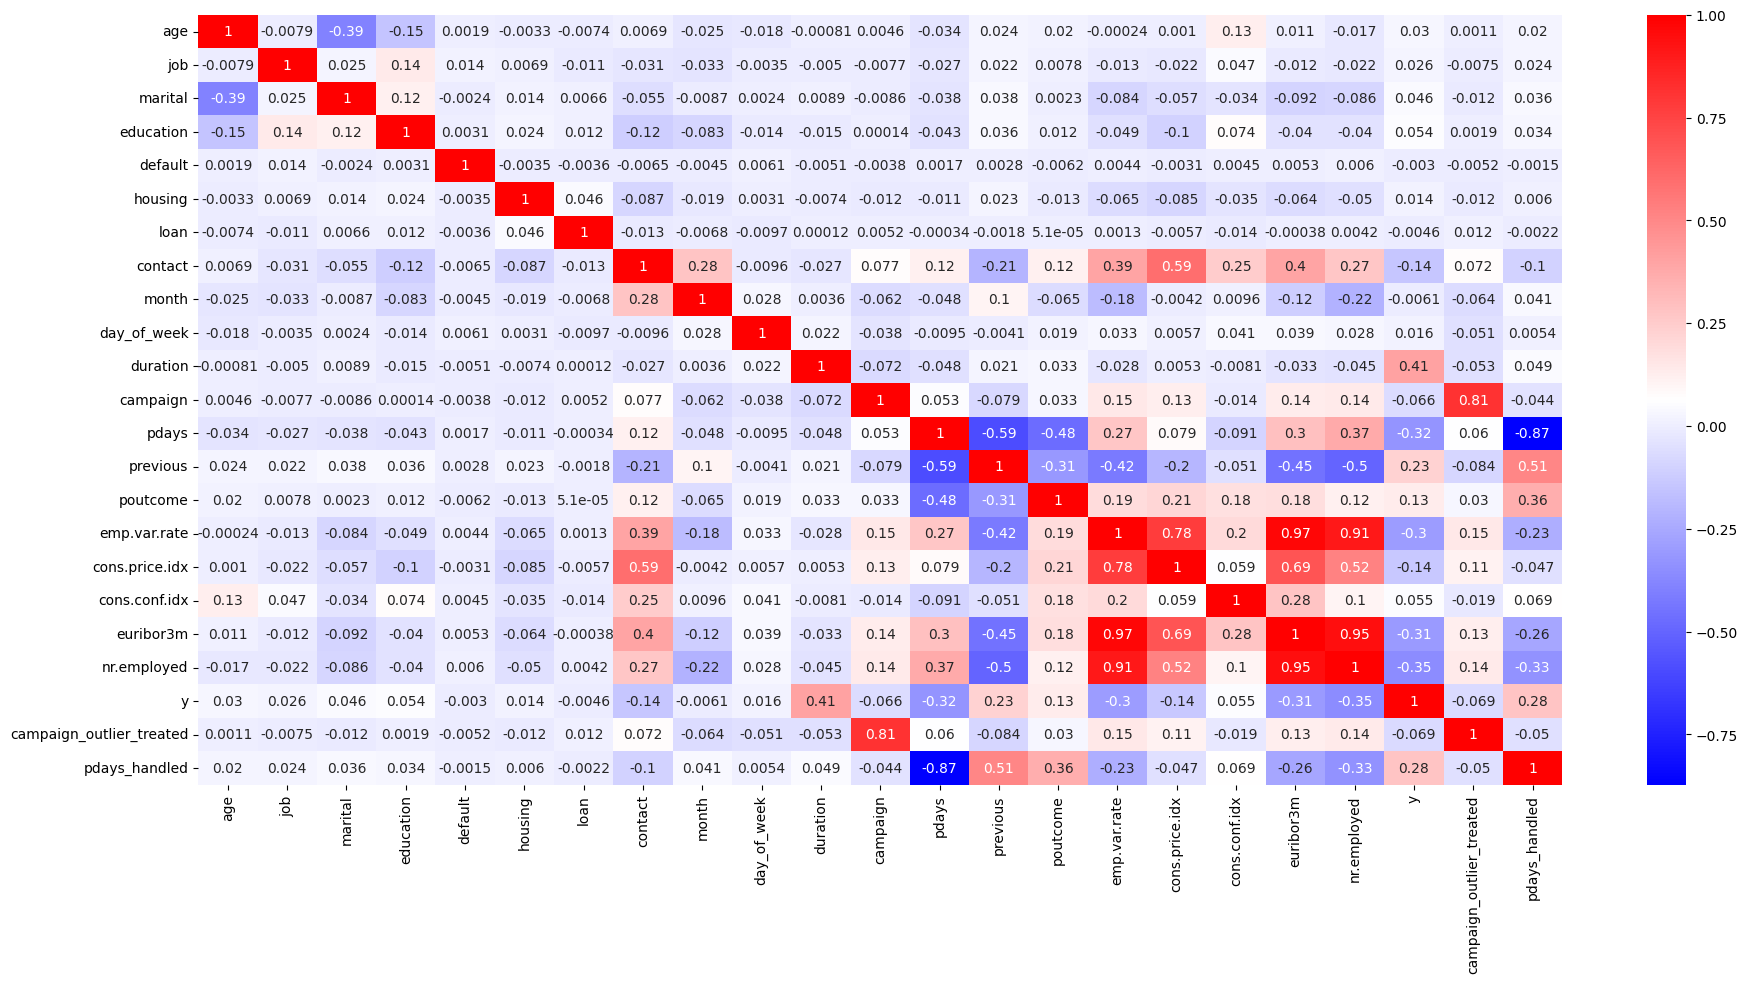

In [42]:
# Heatmap to visualize the correlations between the different features (columns)
plt.figure(figsize=(22,10))
sns.heatmap(new_df.corr(), cmap='bwr', annot=True)
plt.show()

In [43]:
#Splitting input and output
X = new_df.drop('y', axis=1)
y = new_df['y']

# Since this variable 'duration' influences the target (y) but is not usable for prediction in a realistic model, drop it from the dataframe
X = X.drop('duration', axis=1)

# Drop the columns with outliers, which were recently removed
# drop_cols = ['pdays','campaign','duration_outlier_treated','campaign_outlier_treated']
# drop_cols = ['pdays', 'pdays_handled', 'campaign','campaign_outlier_treated', 'previous']
drop_cols = ['pdays' , 'campaign']
# drop_cols = ['pdays' ]

X = X.drop(drop_cols, axis=1)


In [44]:
X.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_outlier_treated,pdays_handled
age,1.000000,-0.007875,-0.394075,-0.153840,0.001892,-0.003325,-0.007382,0.006917,-0.025023,-0.017614,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017404,0.001058,0.020476
job,-0.007875,1.000000,0.025083,0.139663,0.013669,0.006885,-0.011471,-0.030830,-0.033065,-0.003511,0.022387,0.007813,-0.012570,-0.021775,0.046519,-0.012364,-0.022111,-0.007494,0.024367
marital,-0.394075,0.025083,1.000000,0.116760,-0.002395,0.013563,0.006610,-0.054977,-0.008707,0.002411,0.038227,0.002323,-0.084018,-0.057164,-0.033699,-0.091940,-0.086451,-0.011632,0.036491
education,-0.153840,0.139663,0.116760,1.000000,0.003052,0.023767,0.012426,-0.118808,-0.082851,-0.014297,0.035828,0.012401,-0.049464,-0.099760,0.073820,-0.039920,-0.039653,0.001940,0.033867
default,0.001892,0.013669,-0.002395,0.003052,1.000000,-0.003489,-0.003612,-0.006476,-0.004529,0.006079,0.002765,-0.006195,0.004445,-0.003142,0.004494,0.005274,0.005951,-0.005187,-0.001458
housing,-0.003325,0.006885,0.013563,0.023767,-0.003489,1.000000,0.045681,-0.086526,-0.018664,0.003065,0.023449,-0.013356,-0.065204,-0.085463,-0.035306,-0.064169,-0.050260,-0.011873,0.005953
loan,-0.007382,-0.011471,0.006610,0.012426,-0.003612,0.045681,1.000000,-0.013279,-0.006822,-0.009676,-0.001781,0.000051,0.001325,-0.005712,-0.013556,-0.000378,0.004191,0.012096,-0.002243
contact,0.006917,-0.030830,-0.054977,-0.118808,-0.006476,-0.086526,-0.013279,1.000000,0.276499,-0.009614,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269501,0.071645,-0.102405
month,-0.025023,-0.033065,-0.008707,-0.082851,-0.004529,-0.018664,-0.006822,0.276499,1.000000,0.027683,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.220507,-0.063803,0.040804
day_of_week,-0.017614,-0.003511,0.002411,-0.014297,0.006079,0.003065,-0.009676,-0.009614,0.027683,1.000000,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028473,-0.051014,0.005429


In [45]:
# # Assuming the data is stored in a DataFrame called 'data'
# # and the target variable 'y' is excluded from this multicollinearity check.

# # Define a function to calculate VIF
# def calculate_vif(dataframe):
#     # Add a constant for VIF calculation
#     X = dataframe.assign(const=1)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X.columns
#     vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif_data.drop(vif_data[vif_data['feature'] == 'const'].index)  # Exclude the constant

# # Load the feature data (excluding the target 'y')
# # Replace this with the actual data loading code or DataFrame
# # For now, simulating the structure based on correlation matrix data
# data_columns = [new_df.select_dtypes(include='object').columns]


# # Calculate VIF for the data
# vif_results = calculate_vif(X)
# vif_results.sort_values(by="VIF", ascending=False)


# **Feature Engineering - Use PCA to Dimentiallity Reduction of Highly correlated features**


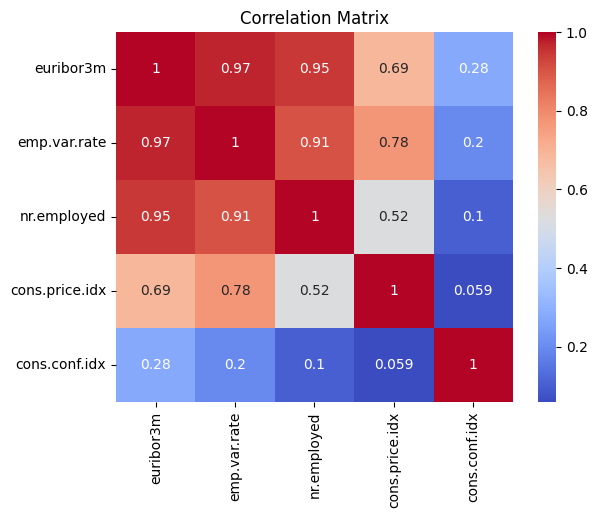

In [46]:
features = ["euribor3m", "emp.var.rate", "nr.employed", "cons.price.idx","cons.conf.idx"]

# 1. Correlation Matrix for above features
corr_matrix = X[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [47]:
data_transformed = X.copy()
data_transformed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_outlier_treated,pdays_handled
0,56,3,1,0,0,0,0,1,6,1,0,1,1.1,93.994,-36.4,4.857,5191,1.0,-1
1,57,7,1,3,0,0,0,1,6,1,0,1,1.1,93.994,-36.4,4.857,5191,1.0,-1
2,37,7,1,3,0,1,0,1,6,1,0,1,1.1,93.994,-36.4,4.857,5191,1.0,-1
3,40,0,1,1,0,0,0,1,6,1,0,1,1.1,93.994,-36.4,4.857,5191,1.0,-1
4,56,7,1,3,0,0,1,1,6,1,0,1,1.1,93.994,-36.4,4.857,5191,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,0,1,-1.1,94.767,-50.8,1.028,4964,1.0,-1
41184,46,1,1,5,0,0,0,0,7,0,0,1,-1.1,94.767,-50.8,1.028,4964,1.0,-1
41185,56,5,1,6,0,1,0,0,7,0,0,1,-1.1,94.767,-50.8,1.028,4964,2.0,-1
41186,44,9,1,5,0,0,0,0,7,0,0,1,-1.1,94.767,-50.8,1.028,4964,1.0,-1


In [48]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_transformed[["euribor3m", "emp.var.rate", "nr.employed"]])

# Apply PCA
pca = PCA(n_components=1)  # Reduce to one component
principal_component = pca.fit_transform(scaled_features)

# Add PCA component to data
data_transformed["PCA_Component_rates"] = principal_component
data_transformed.drop(columns=["euribor3m", "emp.var.rate", "nr.employed"], inplace=True)

print("Data After PCA:\n", data_transformed.head())


Data After PCA:
    age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  previous  poutcome  cons.price.idx  cons.conf.idx  \
0            1         0         1          93.994          -36.4   
1            1         0         1          93.994          -36.4   
2            1         0         1          93.994          -36.4   
3            1         0         1          93.994          -36.4   
4            1         0         1          93.994          -36.4   

   campaign_outlier_treated  pdays_handled  PCA_Component_rates  
0                       1.0             -1         

In [49]:
# # Standardize the features
# scaler = StandardScaler()
# scaled_features_days = scaler.fit_transform(data_transformed[["pdays_category", "previous_category"]])

# # Apply PCA
# pca = PCA(n_components=1)  # Reduce to one component
# principal_component = pca.fit_transform(scaled_features_days)

# # Add PCA component to data
# data_transformed["PCA_Component_days"] = principal_component
# data_transformed.drop(columns=["pdays_category", "previous_category"], inplace=True)

# print("Data After PCA:\n", data_transformed.head())


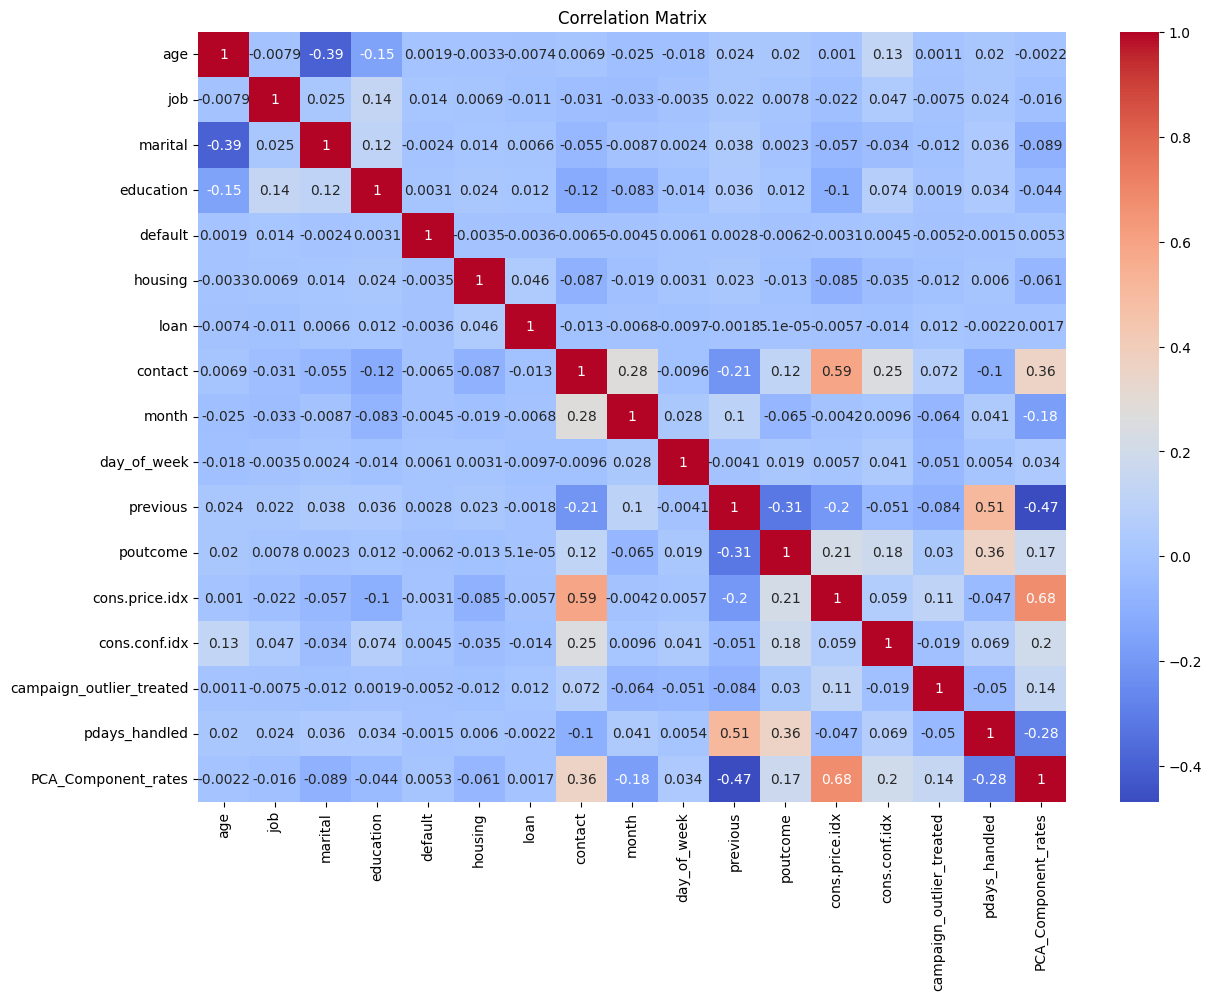

In [50]:
# Correlation Matrix after PCA
corr_matrix = data_transformed.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [51]:
data_transformed['PCA_Component_rates'].value_counts()

,count
PCA_Component_rates,
0.979745,2868
1.417976,2611
1.418313,2487
1.417639,1902
0.979408,1210
...,...
0.008576,1
0.033169,1
0.240576,1


In [52]:
# data_transformed['PCA_Component_days'].value_counts()

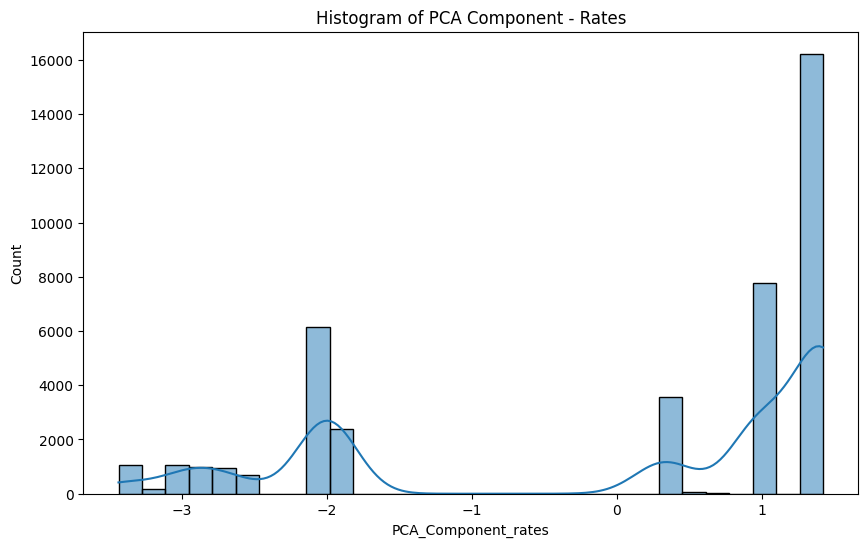

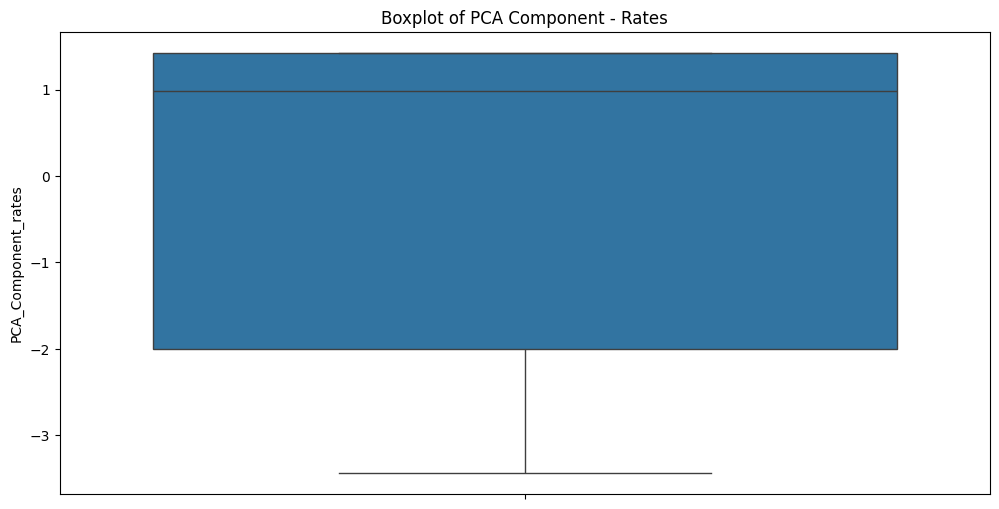

In [53]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_transformed["PCA_Component_rates"], kde=True, bins=30)
plt.title("Histogram of PCA Component - Rates")
plt.show()

# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_transformed["PCA_Component_rates"])
plt.title("Boxplot of PCA Component - Rates")
plt.show()

In [54]:
# # Histogram
# plt.figure(figsize=(10, 6))
# sns.histplot(data_transformed["PCA_Component_days"], kde=True, bins=30)
# plt.title("Histogram of PCA Component - Days")
# plt.show()

# # boxplot
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=data_transformed["PCA_Component_days"])
# plt.title("Boxplot of PCA Component - Days")
# plt.show()

# **Standardisation & Feature Scalling**


In [55]:
data_transformed.head()
X = data_transformed
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,cons.price.idx,cons.conf.idx,campaign_outlier_treated,pdays_handled,PCA_Component_rates
0,56,3,1,0,0,0,0,1,6,1,0,1,93.994,-36.4,1.0,-1,0.979745
1,57,7,1,3,0,0,0,1,6,1,0,1,93.994,-36.4,1.0,-1,0.979745
2,37,7,1,3,0,1,0,1,6,1,0,1,93.994,-36.4,1.0,-1,0.979745
3,40,0,1,1,0,0,0,1,6,1,0,1,93.994,-36.4,1.0,-1,0.979745
4,56,7,1,3,0,0,1,1,6,1,0,1,93.994,-36.4,1.0,-1,0.979745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,0,1,94.767,-50.8,1.0,-1,-2.913719
41184,46,1,1,5,0,0,0,0,7,0,0,1,94.767,-50.8,1.0,-1,-2.913719
41185,56,5,1,6,0,1,0,0,7,0,0,1,94.767,-50.8,2.0,-1,-2.913719
41186,44,9,1,5,0,0,0,0,7,0,0,1,94.767,-50.8,1.0,-1,-2.913719


In [57]:
# Standardisation

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(data_transformed), columns=data_transformed.columns)


# **Model building - Random Forest Classifier**

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate on the training set
print("Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_train, y_pred_train)*100)
print("Classification Report:\n", classification_report(y_train, y_pred_train))

# Evaluate on the test set
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Training Set Evaluation:
Accuracy: 99.42926533090467
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     29272
           1       0.99      0.96      0.97      3668

    accuracy                           0.99     32940
   macro avg       0.99      0.98      0.99     32940
weighted avg       0.99      0.99      0.99     32940


Test Set Evaluation:
Accuracy: 88.8052452646916
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.55      0.28      0.37       971

    accuracy                           0.89      8236
   macro avg       0.73      0.62      0.65      8236
weighted avg       0.87      0.89      0.87      8236

Confusion Matrix:
 [[7042  223]
 [ 699  272]]


In [61]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


Feature Importance:
                      Feature    Importance
0                        age  2.030709e-01
16       PCA_Component_rates  1.827821e-01
1                        job  8.606453e-02
14  campaign_outlier_treated  7.906510e-02
3                  education  7.107908e-02
9                day_of_week  6.163635e-02
15             pdays_handled  5.418843e-02
13             cons.conf.idx  4.015886e-02
2                    marital  3.866073e-02
5                    housing  3.736569e-02
12            cons.price.idx  3.413528e-02
11                  poutcome  3.173892e-02
6                       loan  2.436615e-02
8                      month  2.338618e-02
10                  previous  1.768170e-02
7                    contact  1.461954e-02
4                    default  5.037196e-07


In [62]:
cv_scores = cross_val_score(rf_model,X_train,y_train,cv=5,scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())

cv_scores = cross_val_score(rf_model,X_test,y_test,cv=5,scoring='accuracy')
print("Cross-validation Accuracy (Test):", cv_scores.mean())

Cross-validation Accuracy: 0.8966302367941712
Cross-validation Accuracy (Test): 0.8890241008954204


# **Handle the class imbalance using SMOTE (Synthetic Minority Oversampling Technique)**

In [63]:
# Display class distribution before SMOTE
print("Class Distribution Before SMOTE:")
print("Training Data:\n", y_train.value_counts())
print("Testing Data:\n", y_test.value_counts())

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply SMOTE on testing data
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print("Training Data:\n", y_train_smote.value_counts())
print("Testing Data:\n", y_test_smote.value_counts())

Class Distribution Before SMOTE:
Training Data:
 y
0    29272
1     3668
Name: count, dtype: int64
Testing Data:
 y
0    7265
1     971
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validatio


Class Distribution After SMOTE:
Training Data:
 y
0    29272
1    29272
Name: count, dtype: int64
Testing Data:
 y
1    7265
0    7265
Name: count, dtype: int64


In [64]:
# Train Random Forest with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3})
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)

In [65]:
# Evaluate on the training set
y_pred_train = rf_model.predict(X_train_smote)
print("\nTraining Set Evaluation:")
print("Accuracy:", accuracy_score(y_train_smote, y_pred_train)*100)
print("Classification Report:\n", classification_report(y_train_smote, y_pred_train))

# Evaluate on the test set (with SMOTE applied)
y_pred_test = rf_model.predict(X_test_smote)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test_smote, y_pred_test)*100)
print("Classification Report:\n", classification_report(y_test_smote, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_test))


Training Set Evaluation:
Accuracy: 99.6703334244329
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     29272
           1       0.99      1.00      1.00     29272

    accuracy                           1.00     58544
   macro avg       1.00      1.00      1.00     58544
weighted avg       1.00      1.00      1.00     58544


Test Set Evaluation:
Accuracy: 89.03647625602203
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7265
           1       0.95      0.83      0.88      7265

    accuracy                           0.89     14530
   macro avg       0.90      0.89      0.89     14530
weighted avg       0.90      0.89      0.89     14530

Confusion Matrix:
 [[6919  346]
 [1247 6018]]


# **Threshold Tuninng**

In [66]:
# Predict probabilities for the test set
y_pred_prob = rf_model.predict_proba(X_test_smote)[:, 1]

# Compute precision, recall, and thresholds
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_smote, y_pred_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best Threshold (Max F1-Score):", best_threshold)

# Apply the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# Evaluate with the best threshold
print("\nEvaluation with Best Threshold:")
print("Precision:", precision_score(y_test_smote, y_pred_best))
print("Recall:", recall_score(y_test_smote, y_pred_best))
print("F1-Score:", f1_score(y_test_smote, y_pred_best))
print("Classification Report:\n", classification_report(y_test_smote, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best))


Best Threshold (Max F1-Score): 0.325

Evaluation with Best Threshold:
Precision: 0.9021294021294022
Recall: 0.9097040605643496
F1-Score: 0.9059008978137207
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7265
           1       0.90      0.91      0.91      7265

    accuracy                           0.91     14530
   macro avg       0.91      0.91      0.91     14530
weighted avg       0.91      0.91      0.91     14530

Confusion Matrix:
 [[6548  717]
 [ 656 6609]]


Best Threshold (Max F1-Score): 0.325
Max F1-Score: 0.9059008978137209

Evaluation with Best Threshold:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7265
           1       0.90      0.91      0.91      7265

    accuracy                           0.91     14530
   macro avg       0.91      0.91      0.91     14530
weighted avg       0.91      0.91      0.91     14530

Confusion Matrix:
 [[6548  717]
 [ 656 6609]]


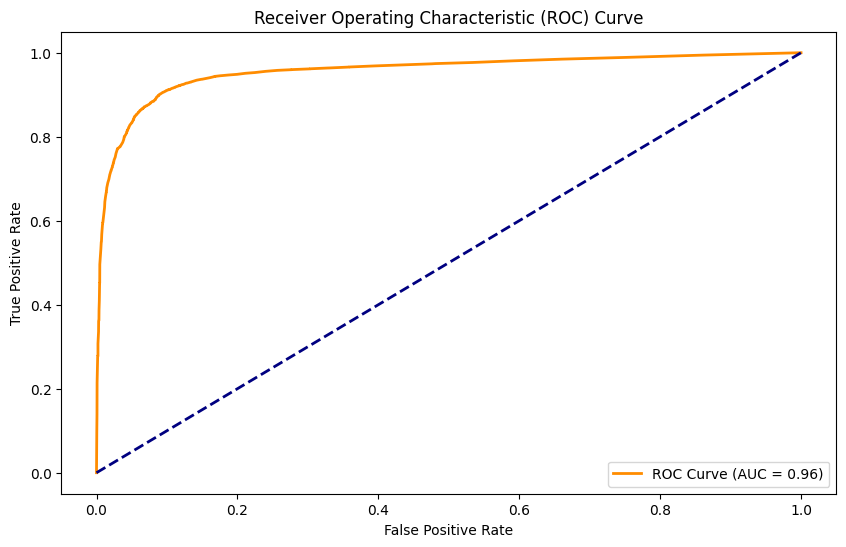

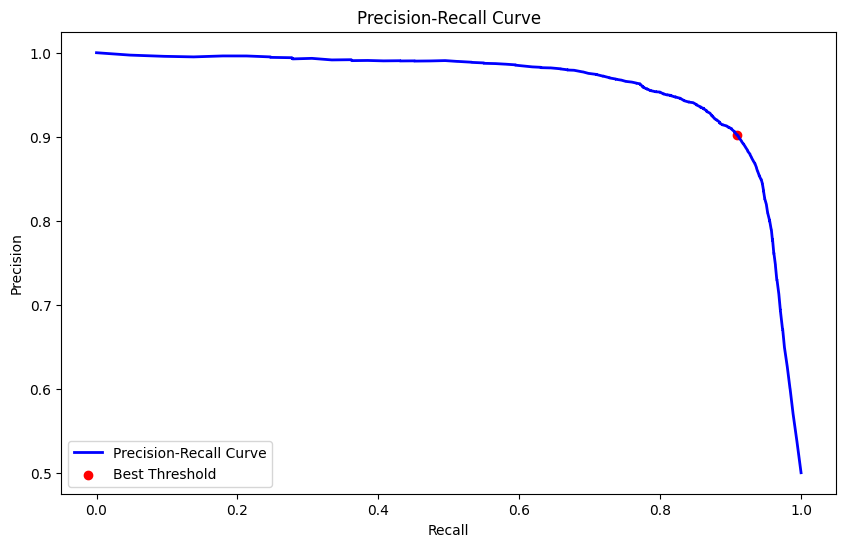

In [67]:
# Predict probabilities for the test set
y_pred_prob = rf_model.predict_proba(X_test_smote)[:, 1]

# Compute ROC Curve and AUC
fpr, tpr, roc_thresholds = roc_curve(y_test_smote, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test_smote, y_pred_prob)

# Compute F1 scores for each threshold in Precision-Recall Curve
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = pr_thresholds[np.argmax(f1_scores)]

print("Best Threshold (Max F1-Score):", best_threshold)
print("Max F1-Score:", np.max(f1_scores))

# Apply the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# Evaluate with the best threshold
print("\nEvaluation with Best Threshold:")
print("Classification Report:\n", classification_report(y_test_smote, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best))

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], color='red', label='Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# **Hyper Parameter Tunning using GridSearchCV**

In [68]:
# Hyper Parameter Tunning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    scoring='f1',
    cv=3
)
grid_search.fit(X_train_smote, y_train_smote)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_test = best_rf_model.predict(X_test_smote)

print("Best Parameters:", grid_search.best_params_)
print("Test Set Evaluation:")
print("Accuracy:", best_rf_model.score(X_test_smote, y_test_smote))
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smote, y_pred_test))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test Set Evaluation:
Accuracy: 0.8984170681348933
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7265
           1       0.94      0.85      0.89      7265

    accuracy                           0.90     14530
   macro avg       0.90      0.90      0.90     14530
weighted avg       0.90      0.90      0.90     14530

Confusion Matrix:
[[6899  366]
 [1110 6155]]


In [69]:
# Predict probabilities for the test set
y_pred_prob = best_rf_model.predict_proba(X_test_smote)[:, 1]

# Compute precision, recall, and thresholds
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_smote, y_pred_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best Threshold (Max F1-Score):", best_threshold)

# Apply the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# Evaluate with the best threshold
print("\nEvaluation with Best Threshold:")
print("Precision:", precision_score(y_test_smote, y_pred_best))
print("Recall:", recall_score(y_test_smote, y_pred_best))
print("F1-Score:", f1_score(y_test_smote, y_pred_best))
print("Classification Report:\n", classification_report(y_test_smote, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best))


Best Threshold (Max F1-Score): 0.3616666666666667

Evaluation with Best Threshold:
Precision: 0.9137380191693291
Recall: 0.9054370268410186
F1-Score: 0.9095685840707964
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7265
           1       0.91      0.91      0.91      7265

    accuracy                           0.91     14530
   macro avg       0.91      0.91      0.91     14530
weighted avg       0.91      0.91      0.91     14530

Confusion Matrix:
 [[6644  621]
 [ 687 6578]]


# **Hyper Parameter Tunning using RandomizedSearchCV**

In [ ]:
# Hyper Parameter Tunning using RandomizedSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to SMOTE-augmented data
rf_random.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model
best_rf_random_model = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


NameError: name 'best_rf_model' is not defined

In [ ]:
y_pred_test = best_rf_random_model.predict(X_test_smote)

print("Test Set Evaluation:")
print("Accuracy:", best_rf_random_model.score(X_test_smote, y_test_smote))
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test_smote, y_pred_test))

Test Set Evaluation:
Accuracy: 0.9019958706125258
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7265
           1       0.95      0.85      0.90      7265

    accuracy                           0.90     14530
   macro avg       0.91      0.90      0.90     14530
weighted avg       0.91      0.90      0.90     14530

Confusion Matrix:
[[6956  309]
 [1115 6150]]


In [ ]:
# Predict probabilities for the test set
y_pred_prob = best_rf_random_model.predict_proba(X_test_smote)[:, 1]

# Compute precision, recall, and thresholds
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_smote, y_pred_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best Threshold (Max F1-Score):", best_threshold)

# Apply the best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# Evaluate with the best threshold
print("\nEvaluation with Best Threshold:")
print("Precision:", precision_score(y_test_smote, y_pred_best))
print("Recall:", recall_score(y_test_smote, y_pred_best))
print("F1-Score:", f1_score(y_test_smote, y_pred_best))
print("Classification Report:\n", classification_report(y_test_smote, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best))


In [ ]:
# Cross-validation to evaluate the performance of the rf_model
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())

cv_scores = cross_val_score(rf_model, X_test_smote, y_test_smote, cv=5, scoring='accuracy')
print("Cross-validation Accuracy (Test):", cv_scores.mean())

Cross-validation Accuracy: 0.9373749462035486
Cross-validation Accuracy (Test): 0.9380213673993651


# **Neural Networks**

In [70]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import Loss
from tensorflow.keras.regularizers import l2
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score

## **ANN**

### **model_1**

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'), #we may right it "tf.keras.activations.relu" too

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_1.compile( loss= tf.keras.losses.binary_crossentropy,

                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),

                metrics = ['accuracy'])

model_1.fit(X_train, y_train, epochs = 25, verbose = 0)


results = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Generate predictions
y_pred = model_1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print classification report
class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:")
print(class_report)


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8962 - loss: 0.2874
Test Loss: 0.29020845890045166, Test Accuracy: 0.894123375415802
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[7174   91]
 [ 781  190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.68      0.20      0.30       971

    accuracy                           0.89      8236
   macro avg       0.79      0.59      0.62      8236
weighted avg       0.88      0.89      0.87      8236



### **model_3**

In [71]:
# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = dict(enumerate(class_weights))

# Build the Optimized ANN Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cosine_lr = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.001, decay_steps=10000, alpha=0.01
)

# Compile the Model with Improved Settings
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=cosine_lr),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.AUC(name='auc'), 'accuracy']
)

# Define Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

class_weights_dict[1] *= 0.8  # Reduce weight for class 1

# Train the Model
history = model_3.fit(
    X_train_smote,
    y_train_smote,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

Epoch 1/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7198 - auc: 0.7391 - loss: 2.7077 - val_accuracy: 0.5302 - val_auc: 0.0000e+00 - val_loss: 0.9958
Epoch 2/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7607 - auc: 0.7877 - loss: 0.5901 - val_accuracy: 0.5289 - val_auc: 0.0000e+00 - val_loss: 0.8277
Epoch 3/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7654 - auc: 0.7964 - loss: 0.4858 - val_accuracy: 0.5521 - val_auc: 0.0000e+00 - val_loss: 0.9049
Epoch 4/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7684 - auc: 0.8001 - loss: 0.4751 - val_accuracy: 0.5741 - val_auc: 0.0000e+00 - val_loss: 0.8354
Epoch 5/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7728 - auc: 0.8043 - loss: 0.4710 - val_accuracy: 0.5529 - val_auc: 0.0000e+00 - val_loss: 0.8357
Epoch 6/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7808 - auc: 0.8182 - loss: 0.4560 - val_accuracy: 0.5878 - val_auc: 0.0000e+00 - val_loss: 0.7802
Epoch 7/10

In [72]:
# Evaluate on Test Set
test_loss, test_auc, test_accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test AUC: {test_auc}, Test Accuracy: {test_accuracy}")


# Predictions
y_pred_probs = model_3.predict(X_test).flatten()  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Predicted binary classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {roc_auc}")

Test Loss: 0.3880687355995178, Test AUC: 0.7625318169593811, Test Accuracy: 0.8697183132171631
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[6673  592]
 [ 481  490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7265
           1       0.45      0.50      0.48       971

    accuracy                           0.87      8236
   macro avg       0.69      0.71      0.70      8236
weighted avg       0.88      0.87      0.87      8236


ROC-AUC Score: 0.7627005598700937


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - auc: 0.7691 - loss: 0.4469
Test Loss: 0.6155, Test AUC: 0.8000, Test Accuracy: 0.7304
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


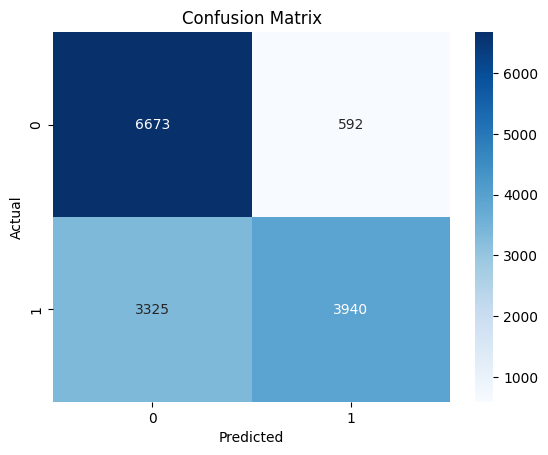

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77      7265
           1       0.87      0.54      0.67      7265

    accuracy                           0.73     14530
   macro avg       0.77      0.73      0.72     14530
weighted avg       0.77      0.73      0.72     14530

ROC-AUC Score: 0.8001


In [73]:
# Evaluate Model on Test Set
test_loss, test_auc, test_accuracy = model_3.evaluate(X_test_smote, y_test_smote, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test AUC: {test_auc:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate Predictions
y_pred_probs = model_3.predict(X_test_smote)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_smote, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")


In [74]:
# Predict probabilities on the test set
y_pred_probs = model_3.predict(X_test_smote).flatten()

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test_smote, y_pred_probs)

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Adding epsilon to avoid division by zero

# Find the index of the optimal threshold (max F1-score)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Apply the optimal threshold
y_pred_optimized = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the results
conf_matrix = confusion_matrix(y_test_smote, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test_smote, y_pred_optimized)
print("\nClassification Report:")
print(classification_rep)

# Calculate F1-Score for optimized predictions
optimized_f1_score = f1_score(y_test_smote, y_pred_optimized)
print(f"\nOptimized F1-Score: {optimized_f1_score}")


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Optimal Threshold: 0.2274327576160431
Confusion Matrix:
[[4969 2296]
 [1770 5495]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      7265
           1       0.71      0.76      0.73      7265

    accuracy                           0.72     14530
   macro avg       0.72      0.72      0.72     14530
weighted avg       0.72      0.72      0.72     14530


Optimized F1-Score: 0.7299415515409139


### **model_4**

In [75]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Custom loss function
def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    positive_loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
    negative_loss = -(1 - y_true) * (1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
    loss = tf.reduce_mean(positive_loss + negative_loss)
    return loss

# Compile your model using the manually implemented focal loss
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=focal_loss,
    metrics=['accuracy']
)

# Define Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3
)

# Train the Model
history = model_4.fit(
    X_train_smote,
    y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6670 - loss: 0.0640 - val_accuracy: 0.2523 - val_loss: 0.0765 - learning_rate: 0.0010
Epoch 2/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7070 - loss: 0.0510 - val_accuracy: 0.3301 - val_loss: 0.0802 - learning_rate: 0.0010
Epoch 3/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7215 - loss: 0.0495 - val_accuracy: 0.2817 - val_loss: 0.0817 - learning_rate: 0.0010
Epoch 4/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7209 - loss: 0.0493 - val_accuracy: 0.3875 - val_loss: 0.0752 - learning_rate: 0.0010
Epoch 5/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7285 - loss: 0.0491 - val_accuracy: 0.3494 - val_loss: 0.0798 - learning_rate: 0.0010
Epoch 6/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7357 - loss: 0.0482 - val_accuracy: 0.3332 - val_loss: 0.0775 - learning_rate: 0.0010
Epoch 7/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7406 - l

In [76]:
# Evaluate on Test Set
test_loss, test_accuracy = model_4.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predictions
y_pred_probs = model_4.predict(X_test).flatten()  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Predicted binary classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"\nROC-AUC Score: {roc_auc}")

Test Loss: 0.042408715933561325, Test Accuracy: 0.8886595368385315
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[6966  299]
 [ 618  353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7265
           1       0.54      0.36      0.43       971

    accuracy                           0.89      8236
   macro avg       0.73      0.66      0.69      8236
weighted avg       0.87      0.89      0.88      8236


ROC-AUC Score: 0.7767805236936541


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8323 - loss: 0.0464
Test Loss: 0.0579, Test AUC: 0.8000, Test Accuracy: 0.6685
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


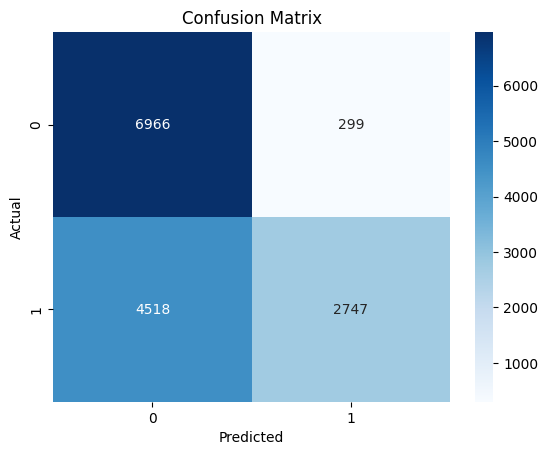

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74      7265
           1       0.90      0.38      0.53      7265

    accuracy                           0.67     14530
   macro avg       0.75      0.67      0.64     14530
weighted avg       0.75      0.67      0.64     14530

ROC-AUC Score: 0.7954


In [77]:
# Evaluate Model on Test Set
test_loss, test_accuracy = model_4.evaluate(X_test_smote, y_test_smote, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test AUC: {test_auc:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate Predictions
y_pred_probs = model_4.predict(X_test_smote)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test_smote, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")


In [78]:
# Predict probabilities on the test set
y_pred_probs = model_4.predict(X_test_smote).flatten()

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test_smote, y_pred_probs)

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Adding epsilon to avoid division by zero

# Find the index of the optimal threshold (max F1-score)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Apply the optimal threshold
y_pred_optimized = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the results
conf_matrix = confusion_matrix(y_test_smote, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test_smote, y_pred_optimized)
print("\nClassification Report:")
print(classification_rep)

# Calculate F1-Score for optimized predictions
optimized_f1_score = f1_score(y_test_smote, y_pred_optimized)
print(f"\nOptimized F1-Score: {optimized_f1_score}")


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Optimal Threshold: 0.3473799228668213
Confusion Matrix:
[[5236 2029]
 [1926 5339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      7265
           1       0.72      0.73      0.73      7265

    accuracy                           0.73     14530
   macro avg       0.73      0.73      0.73     14530
weighted avg       0.73      0.73      0.73     14530


Optimized F1-Score: 0.7297204947720904


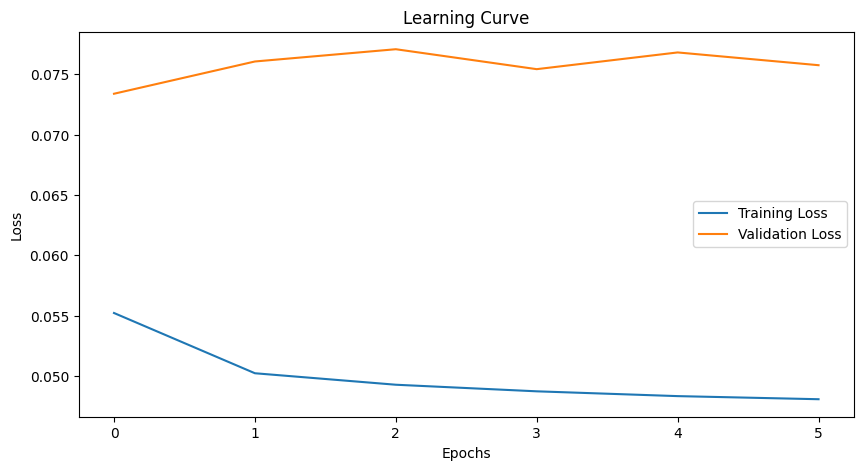

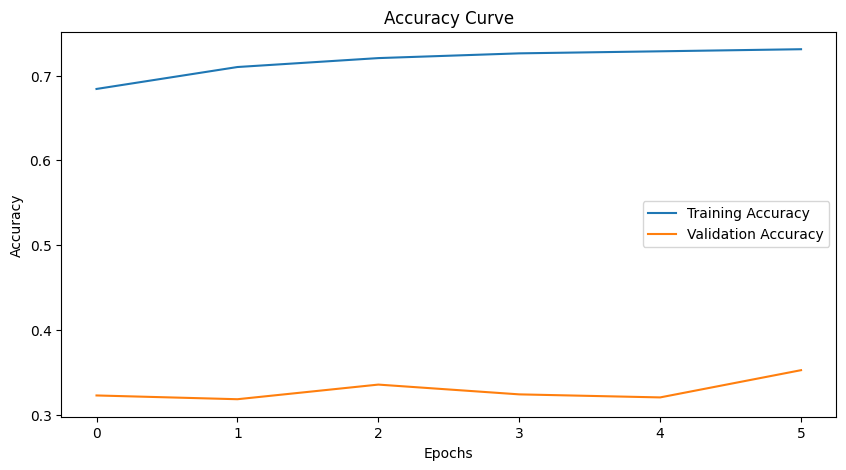

In [ ]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

### **model_5**

In [79]:
# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = dict(enumerate(class_weights))

# Define Custom Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.keras.backend.log(pt))
    return focal_loss_fixed

# Build the Optimized ANN Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the Model
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)

# Define Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=7, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
)

# Train the Model
history = model_5.fit(
    X_train_smote,
    y_train_smote,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6720 - loss: 0.0518 - val_accuracy: 0.5582 - val_loss: 0.0450 - learning_rate: 0.0010
Epoch 2/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7424 - loss: 0.0355 - val_accuracy: 0.5570 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 3/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7563 - loss: 0.0341 - val_accuracy: 0.5811 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 4/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7574 - loss: 0.0338 - val_accuracy: 0.5791 - val_loss: 0.0424 - learning_rate: 0.0010
Epoch 5/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7638 - loss: 0.0332 - val_accuracy: 0.5995 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 6/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7655 - loss: 0.0329 - val_accuracy: 0.5819 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 7/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7675 - loss: 0.

Test Loss: 0.028766827657818794, Test Accuracy: 0.8479844331741333
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


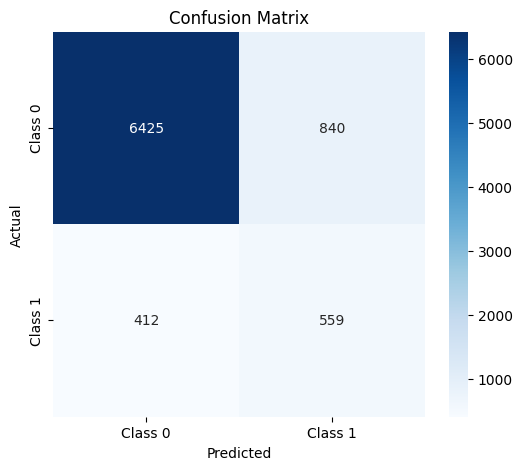


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91      7265
     Class 1       0.40      0.58      0.47       971

    accuracy                           0.85      8236
   macro avg       0.67      0.73      0.69      8236
weighted avg       0.88      0.85      0.86      8236



In [80]:
# Evaluate on Test Set
test_loss, test_accuracy = model_5.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predictions
y_pred_prob = model_5.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)

Test Loss: 0.035112760961055756, Test Accuracy: 0.7408809065818787
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


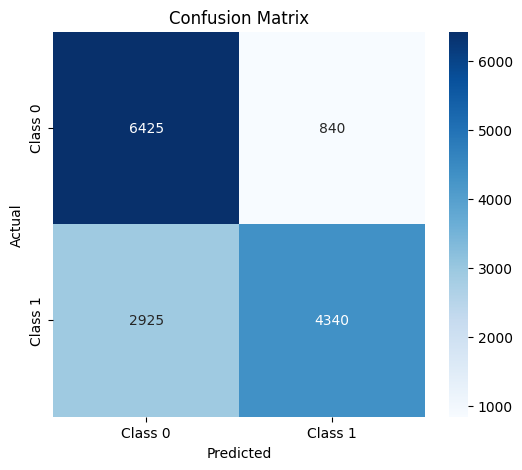


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.69      0.88      0.77      7265
     Class 1       0.84      0.60      0.70      7265

    accuracy                           0.74     14530
   macro avg       0.76      0.74      0.74     14530
weighted avg       0.76      0.74      0.74     14530



In [81]:
# Evaluate on Test Set
test_loss, test_accuracy = model_5.evaluate(X_test_smote, y_test_smote, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predictions
y_pred_prob = model_5.predict(X_test_smote)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test_smote, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)

In [82]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [83]:
import keras_tuner as kt

# Hyperparameter Tuning Function
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
        tf.keras.layers.Dense(
            units=hp.Int('units_layer1', min_value=64, max_value=512, step=64),
            activation=hp.Choice('activation_layer1', ['relu', 'tanh']),
            kernel_initializer='he_normal'
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_layer1', min_value=0.2, max_value=0.5, step=0.1)),

        tf.keras.layers.Dense(
            units=hp.Int('units_layer2', min_value=64, max_value=256, step=64),
            activation=hp.Choice('activation_layer2', ['relu', 'tanh']),
            kernel_initializer='he_normal'
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_layer2', min_value=0.2, max_value=0.4, step=0.1)),

        tf.keras.layers.Dense(
            units=hp.Int('units_layer3', min_value=32, max_value=128, step=32),
            activation=hp.Choice('activation_layer3', ['relu', 'tanh']),
            kernel_initializer='he_normal'
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_layer3', min_value=0.2, max_value=0.4, step=0.1)),

        tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
        ),
        loss=focal_loss(gamma=2., alpha=0.25),
        metrics=['accuracy']
    )
    return model

# Define Tuner
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='nn_hyperparameter_tuning'
)

# Run the Tuner
tuner.search(
    X_train_smote,
    y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=7, restore_best_weights=True
        )
    ],
    class_weight=class_weights_dict
)


# Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Units in Layer 1: {best_hps.get('units_layer1')}")
print(f"Activation in Layer 1: {best_hps.get('activation_layer1')}")
print(f"Dropout in Layer 1: {best_hps.get('dropout_layer1')}")
print(f"Units in Layer 2: {best_hps.get('units_layer2')}")
print(f"Activation in Layer 2: {best_hps.get('activation_layer2')}")
print(f"Dropout in Layer 2: {best_hps.get('dropout_layer2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Trial 20 Complete [00h 07m 46s]
val_accuracy: 0.7733367681503296

Best val_accuracy So Far: 0.7733367681503296
Total elapsed time: 01h 12m 42s
Best Hyperparameters:
Units in Layer 1: 320
Activation in Layer 1: tanh
Dropout in Layer 1: 0.2
Units in Layer 2: 192
Activation in Layer 2: relu
Dropout in Layer 2: 0.30000000000000004
Learning Rate: 0.001


In [85]:
# Build the Best Model
best_model = tuner.hypermodel.build(best_hps)

# Train the Best Model
history = best_model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict
)

# Evaluate on Test Data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6567 - loss: 0.0592 - val_accuracy: 0.4993 - val_loss: 0.0583 - learning_rate: 0.0010
Epoch 2/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7387 - loss: 0.0358 - val_accuracy: 0.5543 - val_loss: 0.0483 - learning_rate: 0.0010
Epoch 3/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7559 - loss: 0.0343 - val_accuracy: 0.5623 - val_loss: 0.0441 - learning_rate: 0.0010
Epoch 4/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7636 - loss: 0.0337 - val_accuracy: 0.5418 - val_loss: 0.0430 - learning_rate: 0.0010
Epoch 5/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7692 - loss: 0.0328 - val_accuracy: 0.5599 - val_loss: 0.0432 - learning_rate: 0.0010
Epoch 6/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7708 - loss: 0.0326 - val_accuracy: 0.5890 - val_loss: 0.0442 - learning_rate: 0.0010
Epoch 7/100
732/732 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7759

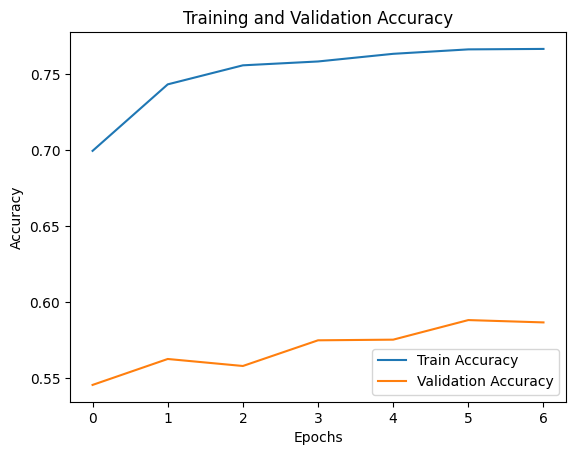

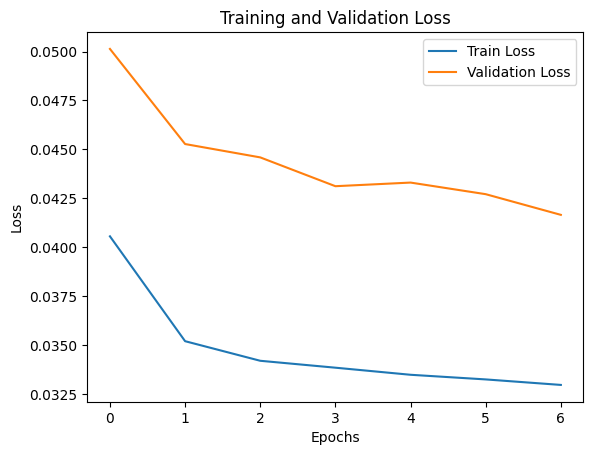

In [ ]:
# Plot Training vs. Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training vs. Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Test Loss: 0.022901274263858795, Test Accuracy: 0.8824672102928162
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


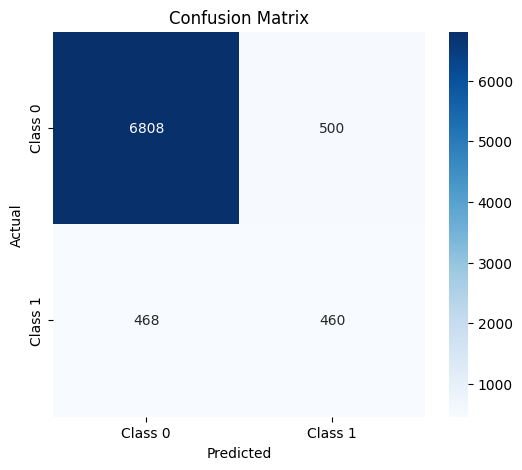


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93      7308
     Class 1       0.48      0.50      0.49       928

    accuracy                           0.88      8236
   macro avg       0.71      0.71      0.71      8236
weighted avg       0.88      0.88      0.88      8236



In [87]:
# Evaluate on Test Set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predictions
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)

Test Loss: 0.04037463292479515, Test Accuracy: 0.6989676356315613
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


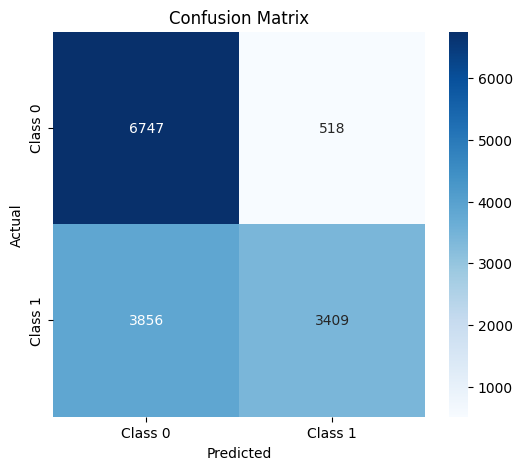


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.64      0.93      0.76      7265
     Class 1       0.87      0.47      0.61      7265

    accuracy                           0.70     14530
   macro avg       0.75      0.70      0.68     14530
weighted avg       0.75      0.70      0.68     14530



In [88]:
# Evaluate on Test Set
test_loss, test_accuracy = best_model.evaluate(X_test_smote, y_test_smote, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Predictions
y_pred_prob = best_model.predict(X_test_smote)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test_smote, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report)

In [89]:
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix

# Predict probabilities on the test set
y_pred_probs = best_model.predict(X_test_smote).flatten()

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(y_test_smote, y_pred_probs)

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Adding epsilon to avoid division by zero

# Find the index of the optimal threshold (max F1-score)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Apply the optimal threshold
y_pred_optimized = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the results
conf_matrix = confusion_matrix(y_test_smote, y_pred_optimized)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test_smote, y_pred_optimized)
print("\nClassification Report:")
print(classification_rep)

# Calculate F1-Score for optimized predictions
optimized_f1_score = f1_score(y_test_smote, y_pred_optimized)
print(f"\nOptimized F1-Score: {optimized_f1_score}")


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Optimal Threshold: 0.3656037747859955
Confusion Matrix:
[[4512 2753]
 [1690 5575]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      7265
           1       0.67      0.77      0.72      7265

    accuracy                           0.69     14530
   macro avg       0.70      0.69      0.69     14530
weighted avg       0.70      0.69      0.69     14530


Optimized F1-Score: 0.7150644519976913


## **CNN**

In [ ]:
X_copy = X.copy()
y_copy = y.copy()

# Convert DataFrame to NumPy array
X_copy = X_copy.to_numpy()

# # Reshape X for CNN
X_copy = X_copy.reshape(X_copy.shape[0], X_copy.shape[1], 1)  # Add a channel dimension for CNN input

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [ ]:
# CNN Model
model_1_CNN = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model_1_CNN.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model_1_CNN.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model
results = model_1_CNN.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


Epoch 1/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8887 - loss: 0.3582 - val_accuracy: 0.8927 - val_loss: 0.3108
Epoch 2/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8956 - loss: 0.3125 - val_accuracy: 0.8934 - val_loss: 0.3040
Epoch 3/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8974 - loss: 0.3066 - val_accuracy: 0.8963 - val_loss: 0.3014
Epoch 4/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8980 - loss: 0.3021 - val_accuracy: 0.8951 - val_loss: 0.2983
Epoch 5/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9006 - loss: 0.2908 - val_accuracy: 0.8940 - val_loss: 0.2964
Epoch 6/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9004 - loss: 0.2893 - val_accuracy: 0.8944 - val_loss: 0.2947
Epoch 7/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9032 - loss: 0.2808 - val_accuracy: 0.8951 - val_loss: 0.2917
Epoch 8/50
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8992 - loss: 0.2882 - val_accuracy: 0

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.70      0.19      0.30       971

    accuracy                           0.89      8236
   macro avg       0.80      0.59      0.62      8236
weighted avg       0.88      0.89      0.87      8236

ROC-AUC: 0.7834252510697353


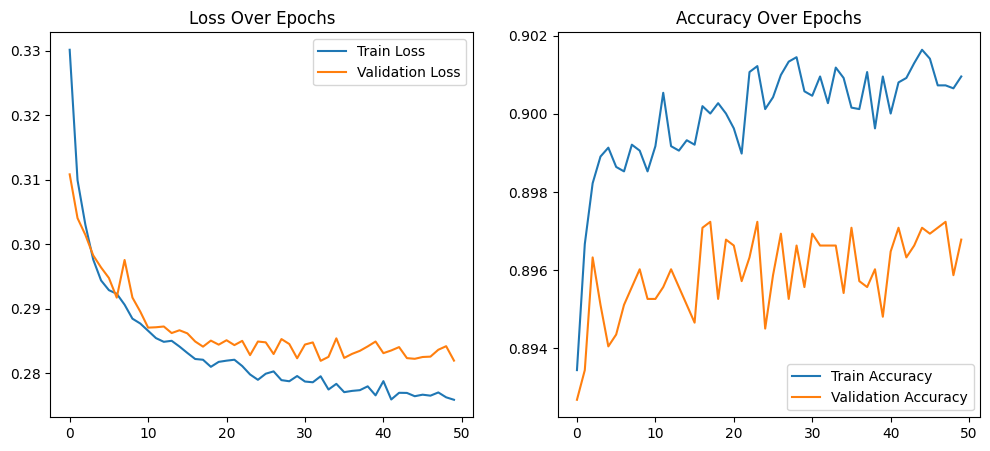

In [ ]:
# Predictions
y_pred = model_1_CNN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_test_classes, y_pred_classes))

# ROC-AUC Score
print("ROC-AUC:", roc_auc_score(y_test_classes, y_pred[:, 1]))

# Plotting Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()


In [ ]:
# Example data preparation
# Assuming X and y are DataFrames or NumPy arrays
X_copy = data_transformed.copy()
y_copy = y.copy()

# Convert DataFrame to NumPy array
X_copy = X_copy.to_numpy()

# Reshape X for CNN
X_copy = X_copy.reshape(X_copy.shape[0], X_copy.shape[1], 1)  # Add a channel dimension for CNN input

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)

# Handle imbalance with SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train.reshape(X_train.shape[0], -1),  # Flatten for SMOTE
    y_train
)

# Reshape X_train_smote back to CNN input format
X_train_smote = X_train_smote.reshape(X_train_smote.shape[0], X_train.shape[1], 1)

# Convert labels to categorical for training
y_train_smote = to_categorical(y_train_smote, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Apply SMOTE to test data
y_test_smote_labels = np.argmax(y_test, axis=1)  # Convert to integer labels
X_test_smote, y_test_smote_labels = smote.fit_resample(
    X_test.reshape(X_test.shape[0], -1),  # Flatten for SMOTE
    y_test_smote_labels
)

# Reshape test data back to CNN input format
X_test_smote = X_test_smote.reshape(X_test_smote.shape[0], X_test.shape[1], 1)

# Convert labels back to one-hot encoding
y_test_smote = to_categorical(y_test_smote_labels, num_classes=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3906 - loss: 0.0875 - val_accuracy: 1.0000 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 2/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3777 - loss: 0.0619 - val_accuracy: 1.0000 - val_loss: 0.0173 - learning_rate: 0.0010
Epoch 3/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3746 - loss: 0.0599 - val_accuracy: 1.0000 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 4/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3865 - loss: 0.0587 - val_accuracy: 1.0000 - val_loss: 0.0142 - learning_rate: 0.0010
Epoch 5/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3886 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 6/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3933 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 7/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3955 - 

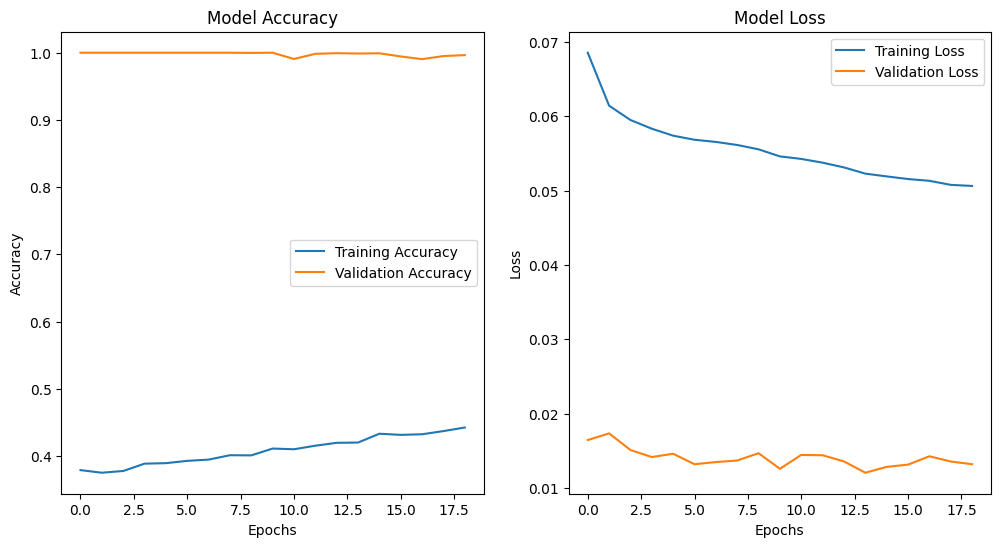

455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 367 6898]
 [  62 7203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.05      0.10      7265
           1       0.51      0.99      0.67      7265

    accuracy                           0.52     14530
   macro avg       0.68      0.52      0.38     14530
weighted avg       0.68      0.52      0.38     14530



In [ ]:
# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Mixup Augmentation
def mixup_data(x, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    index = np.random.permutation(x.shape[0])
    x_mix = lam * x + (1 - lam) * x[index, :]
    y_mix = lam * y + (1 - lam) * y[index, :]
    return x_mix, y_mix

X_train_smote, y_train_smote = mixup_data(X_train_smote, y_train_smote)

# Define Focal Loss for Class Imbalance
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-6, 1.0)  # Avoid log(0)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weights = alpha * tf.pow(1 - y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed


# Model Architecture
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the Model with Updated Loss Function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the Model
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr, early_stopping]
)

# # Evaluate the Model
# X_test_smote, y_test_smote = smote.fit_resample(X_test.reshape(X_test.shape[0], -1), y_test)
# X_test_smote = X_test_smote.reshape(X_test_smote.shape[0], X_test.shape[1], 1)

results = model.evaluate(X_test_smote, y_test_smote)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot Training History
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confussion Matrix and Classification report
y_pred = model.predict(X_test_smote)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_smote, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


In [ ]:
# Compute class weights for training
y_train_smote_labels = np.argmax(y_train_smote, axis=1)  # Convert to integer labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote_labels), y=y_train_smote_labels)
class_weights_dict = dict(enumerate(class_weights))

# Model architecture
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification with one-hot encoding
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])

# Callbacks for learning rate reduction and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1464/1464 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5879 - loss: 0.0635 - val_accuracy: 5.1243e-04 - val_loss: 0.0597 - learning_rate: 0.0010
Epoch 2/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6290 - loss: 0.0415 - val_accuracy: 0.0428 - val_loss: 0.0583 - learning_rate: 0.0010
Epoch 3/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6331 - loss: 0.0414 - val_accuracy: 8.5404e-05 - val_loss: 0.0629 - learning_rate: 0.0010
Epoch 4/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6303 - loss: 0.0414 - val_accuracy: 0.0325 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 5/50
1459/1464 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 0.0413
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6355 - loss: 0.0413 - val_accuracy: 0.0524 - val_loss: 0.0591 - learning_rate: 0.0010
Epoch 6/50
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6392 - loss

In [ ]:
# Evaluate the model
results = model.evaluate(X_test_smote, y_test_smote)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Confussion Matrix and Classification report
y_pred = model.predict(X_test_smote)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_smote, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.0330
Test Loss: 0.035844072699546814, Test Accuracy: 0.7048864364624023
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[6619  646]
 [3642 3623]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      7265
           1       0.85      0.50      0.63      7265

    accuracy                           0.70     14530
   macro avg       0.75      0.70      0.69     14530
weighted avg       0.75      0.70      0.69     14530



# **Ensemble Models**

In [109]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate predictions from the base models
rf_preds_train = best_rf_model.predict_proba(X_train)[:, 1]  # Random forest probabilities
nn_preds_train = model_5.predict(X_train).flatten()   # Neural network probabilities

# Create a stacked dataset for training the meta-model
stacked_train = np.column_stack((rf_preds_train, nn_preds_train))

# Step 2: Train the meta-model
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train)

# Step 3: Make predictions on the test set
rf_preds_test = rf_model.predict_proba(X_test)[:, 1]
nn_preds_test = model_5.predict(X_test).flatten()
stacked_test = np.column_stack((rf_preds_test, nn_preds_test))

# Step 4: Use the meta-model for the final prediction
final_preds = meta_model.predict(stacked_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, final_preds)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Ensemble Model Accuracy: 0.9690


In [110]:
# Step 5: Compute and display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, final_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, final_preds))


Confusion Matrix:
[[7206  102]
 [ 153  775]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7308
           1       0.88      0.84      0.86       928

    accuracy                           0.97      8236
   macro avg       0.93      0.91      0.92      8236
weighted avg       0.97      0.97      0.97      8236



In [111]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate predictions from the base models
rf_preds_train = best_rf_model.predict_proba(X_train_smote)[:, 1]  # Random forest probabilities
nn_preds_train = model_5.predict(X_train_smote).flatten()   # Neural network probabilities

# Create a stacked dataset for training the meta-model
stacked_train = np.column_stack((rf_preds_train, nn_preds_train))

# Step 2: Train the meta-model
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train_smote)

# Step 3: Make predictions on the test set
rf_preds_test = rf_model.predict_proba(X_test_smote)[:, 1]
nn_preds_test = model_5.predict(X_test_smote).flatten()
stacked_test = np.column_stack((rf_preds_test, nn_preds_test))

# Step 4: Use the meta-model for the final prediction
final_preds = meta_model.predict(stacked_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test_smote, final_preds)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


1830/1830 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ensemble Model Accuracy: 0.8973


In [112]:
# Step 5: Compute and display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_smote, final_preds)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test_smote, final_preds))


Confusion Matrix:
[[6882  383]
 [1109 6156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7265
           1       0.94      0.85      0.89      7265

    accuracy                           0.90     14530
   macro avg       0.90      0.90      0.90     14530
weighted avg       0.90      0.90      0.90     14530

